## **Problem Statement**

### Business Context

The prices of the stocks of companies listed under a global exchange are influenced by a variety of factors, with the company's financial performance, innovations and collaborations, and market sentiment being factors that play a significant role. News and media reports can rapidly affect investor perceptions and, consequently, stock prices in the highly competitive financial industry. With the sheer volume of news and opinions from a wide variety of sources, investors and financial analysts often struggle to stay updated and accurately interpret its impact on the market. As a result, investment firms need sophisticated tools to analyze market sentiment and integrate this information into their investment strategies.

### Problem Definition

With an ever-rising number of news articles and opinions, an investment startup aims to leverage artificial intelligence to address the challenge of interpreting stock-related news and its impact on stock prices. They have collected historical daily news for a specific company listed under NASDAQ, along with data on its daily stock price and trade volumes.

As a member of the Data Science and AI team in the startup, you have been tasked with analyzing the data, developing an AI-driven sentiment analysis system that will automatically process and analyze news articles to gauge market sentiment, and summarizing the news at a weekly level to enhance the accuracy of their stock price predictions and optimize investment strategies. This will empower their financial analysts with actionable insights, leading to more informed investment decisions and improved client outcomes.

### Data Dictionary

* `Date` : The date the news was released
* `News` : The content of news articles that could potentially affect the company's stock price
* `Open` : The stock price (in \$) at the beginning of the day
* `High` : The highest stock price (in \$) reached during the day
* `Low` :  The lowest stock price (in \$) reached during the day
* `Close` : The adjusted stock price (in \$) at the end of the day
* `Volume` : The number of shares traded during the day
* `Label` : The sentiment polarity of the news content
    * 1: positive
    * 0: neutral
    * -1: negative

## **Please read the instructions carefully before starting the project.**

**Note**: If the free-tier GPU of Google Colab is not accessible (due to unavailability or exhaustion of daily limit or other reasons), the following steps can be taken:

1. Wait for 12-24 hours until the GPU is accessible again or the daily usage limits are reset.

2. Switch to a different Google account and resume working on the project from there.

3. Try using the CPU runtime:
    - To use the CPU runtime, click on *Runtime* => *Change runtime type* => *CPU* => *Save*
    - One can also click on the *Continue without GPU* option to switch to a CPU runtime (kindly refer to the snapshot below)
    - The instructions for running the code on the CPU are provided in the respective sections of the notebook.

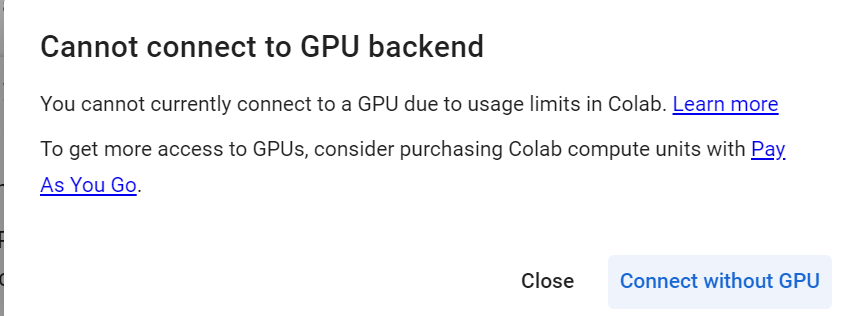

## **Installing and Importing Necessary Libraries**

In [2]:
# installing the libraries needed for this project
!pip install -U sentence-transformers==4.0.2 gensim==4.3.3 transformers==4.50.3 tqdm==4.67.1 scikit-learn==1.6.1 pandas==2.2.2 numpy==1.26.4 matplotlib==3.10.0 seaborn==0.13.2 -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 340.6/340.6 kB 30.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 85.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 103.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 58.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 114.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 92.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [1]:
# Lib to manipulate and analyze data

import pandas as pd
import numpy as np

# Lib to visualize data
import matplotlib.pyplot as plt
import seaborn as sns

# Lib used for time-related functions
import time

# Lib to parse JSON data
import json

# To build, tune, and evaluate ML models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

# To load/create word embeddings
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

# To work with transformer models
import torch
from sentence_transformers import SentenceTransformer

# To implement progress bar related functionalities
from tqdm import tqdm
tqdm.pandas()

# To ignore unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set display options to show more columns and wider content
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.max_rows', None)     # Display all rows (if needed)
pd.set_option('display.width', None)        # Use full available width
pd.set_option('display.max_colwidth', None) # Display full content of each column

## **Loading the dataset**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
stock_news = pd.read_csv('/content/drive/MyDrive/PGP-AIML/Machine Learning/Project6_NLP/stock_news.csv')

#Creating a copy of the dataset
stock = stock_news.copy()

## **Data Overview**

In [5]:
# Understanding the shape of the dataset
stock.shape

(349, 8)

In [6]:
# Checking the data types in the csv file.
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    349 non-null    object 
 1   News    349 non-null    object 
 2   Open    349 non-null    float64
 3   High    349 non-null    float64
 4   Low     349 non-null    float64
 5   Close   349 non-null    float64
 6   Volume  349 non-null    int64  
 7   Label   349 non-null    int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 21.9+ KB


In [7]:
# Displaying the first few rows of the dataset
stock.head()

,Date,News,Open,High,Low,Close,Volume,Label
0,2019-01-02,"The tech sector experienced a significant decline in the aftermarket following Apple's Q1 revenue warning. Notable suppliers, including Skyworks, Broadcom, Lumentum, Qorvo, and TSMC, saw their stocks drop in response to Apple's downward revision of its revenue expectations for the quarter, previously announced in January.",41.740002,42.244999,41.482498,40.246914,130672400,-1
1,2019-01-02,"Apple lowered its fiscal Q1 revenue guidance to $84 billion from earlier estimates of $89-$93 billion due to weaker than expected iPhone sales. The announcement caused a significant drop in Apple's stock price and negatively impacted related suppliers, leading to broader market declines for tech indices such as Nasdaq 10",41.740002,42.244999,41.482498,40.246914,130672400,-1
2,2019-01-02,"Apple cut its fiscal first quarter revenue forecast from $89-$93 billion to $84 billion due to weaker demand in China and fewer iPhone upgrades. CEO Tim Cook also mentioned constrained sales of Airpods and Macbooks. Apple's shares fell 8.5% in post market trading, while Asian suppliers like Hon",41.740002,42.244999,41.482498,40.246914,130672400,-1
3,2019-01-02,"This news article reports that yields on long-dated U.S. Treasury securities hit their lowest levels in nearly a year on January 2, 2019, due to concerns about the health of the global economy following weak economic data from China and Europe, as well as the partial U.S. government shutdown. Apple",41.740002,42.244999,41.482498,40.246914,130672400,-1
4,2019-01-02,"Apple's revenue warning led to a decline in USD JPY pair and a gain in Japanese yen, as investors sought safety in the highly liquid currency. Apple's underperformance in Q1, with forecasted revenue of $84 billion compared to analyst expectations of $91.5 billion, triggered risk aversion mood in markets",41.740002,42.244999,41.482498,40.246914,130672400,-1


In [8]:
print(stock.columns)

Index(['Date', 'News', 'Open', 'High', 'Low', 'Close', 'Volume', 'Label'], dtype='object')


In [9]:
# Show the descriptive statistics of a DataFrame
stock.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,349.0,4.622923e+01,6.442817e+00,3.756750e+01,4.174000e+01,4.597500e+01,5.070750e+01,6.681750e+01
High,349.0,4.670046e+01,6.507321e+00,3.781750e+01,4.224500e+01,4.602500e+01,5.085000e+01,6.706250e+01
Low,349.0,4.574539e+01,6.391976e+00,3.730500e+01,4.148250e+01,4.564000e+01,4.977750e+01,6.586250e+01
Close,349.0,4.492632e+01,6.398338e+00,3.625413e+01,4.024691e+01,4.459692e+01,4.911079e+01,6.480523e+01
Volume,349.0,1.289482e+08,4.317031e+07,4.544800e+07,1.032720e+08,1.156272e+08,1.511252e+08,2.444392e+08
Label,349.0,-5.444126e-02,7.151192e-01,-1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


In [10]:
# Checking for duplicate values
stock.duplicated().sum()

0

In [11]:
# Checking for missing values
stock.isna().sum()

,0
Date,0
News,0
Open,0
High,0
Low,0
Close,0
Volume,0
Label,0


In [12]:
# to convert the 'Date' column in the 'stock' DataFrame to datetime format.
stock['Date'] = pd.to_datetime(stock['Date'])

In [13]:
stock.columns

Index(['Date', 'News', 'Open', 'High', 'Low', 'Close', 'Volume', 'Label'], dtype='object')

In [14]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    349 non-null    datetime64[ns]
 1   News    349 non-null    object        
 2   Open    349 non-null    float64       
 3   High    349 non-null    float64       
 4   Low     349 non-null    float64       
 5   Close   349 non-null    float64       
 6   Volume  349 non-null    int64         
 7   Label   349 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 21.9+ KB


### Details from Data Overview


*  The dataset consists of 349 records and 8 features, capturing daily stock performance and corresponding news sentiment for a NASDAQ-listed company. Each record represents one day's data
*  Sentiment polarity of the news (1 = positive, 0 = neutral, -1 = negative).
*  There are no missing values in the dataset, ensuring a clean starting point for analysis and modeling.
*  There are no duplicate values in the dataset

*  Converting the 'Date' column to datetime format is essential for effective time-series analysis. It enables time-based operations like sorting, filtering, and resampling (e.g., weekly summaries), which are crucial for analyzing trends over time. It also allows for richer feature engineering by extracting elements such as day of the week or month. Additionally, datetime formatting improves the readability of plots by enabling smart axis formatting. Most importantly, it helps prevent parsing errors and simplifies merging with other time-indexed data

*  Stock Price Range: The stock prices show a fairly wide range. The opening price varies from approximately $37.57 to $66.82, with an average around $46.

* The highest recorded price reached $67.06 & the lowest dipped to $36.25

*  Price Volatility: The standard deviations for the Open, High, Low, and Close prices are all around $6.4–$6.5, suggesting moderate volatility in daily stock prices


* Trade Volume:The volume of shares traded ranges from about 45 million to 244 million, with an average daily volume of approximately 129 million shares. This indicates a high level of market activity and liquidity.


*  Sentiment Label Distribution: The mean sentiment score is slightly negative (-0.05), hinting at a slight bias toward negative or neutral news. With a standard deviation of 0.72, it's likely that neutral sentiments (label 0) are most frequent, while positive (1) and negative (-1) labels occur less often.


## **Exploratory Data Analysis**

### Data Cleaning and Preprocessing

In [15]:
# Check for missing values
missing_values = stock.isna().sum()

# Check for duplicates
duplicates = stock.duplicated().sum()

missing_values , duplicates


(Date      0
 News      0
 Open      0
 High      0
 Low       0
 Close     0
 Volume    0
 Label     0
 dtype: int64,
 0)

### Univariate Analysis

* Distribution of individual variables
* Compute and check the distribution of the length of news content
* Visualizing distributions of numerical features (stock prices and volume).
* Checking the frequency of sentiment labels to see how many positive, neutral, and negative news articles there are.

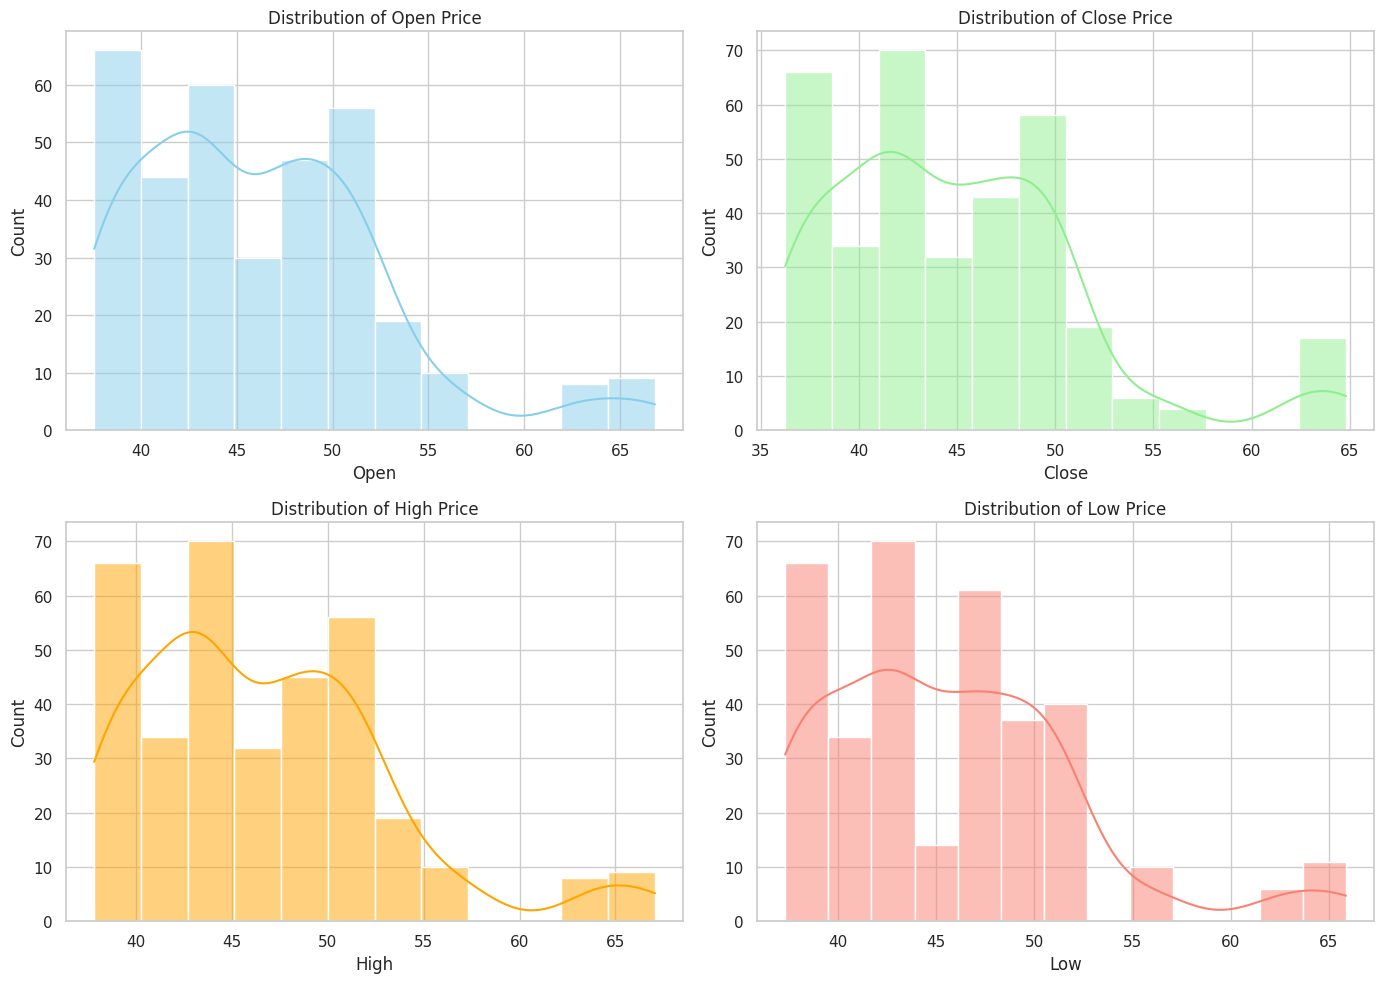

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plot style
sns.set(style="whitegrid")

# Plot histograms for Open, Close, High, and Low
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.histplot(stock['Open'], kde=True, ax=axes[0, 0], color="skyblue")
axes[0, 0].set_title("Distribution of Open Price")

sns.histplot(stock['Close'], kde=True, ax=axes[0, 1], color="lightgreen")
axes[0, 1].set_title("Distribution of Close Price")

sns.histplot(stock['High'], kde=True, ax=axes[1, 0], color="orange")
axes[1, 0].set_title("Distribution of High Price")

sns.histplot(stock['Low'], kde=True, ax=axes[1, 1], color="salmon")
axes[1, 1].set_title("Distribution of Low Price")

plt.tight_layout()
plt.show()

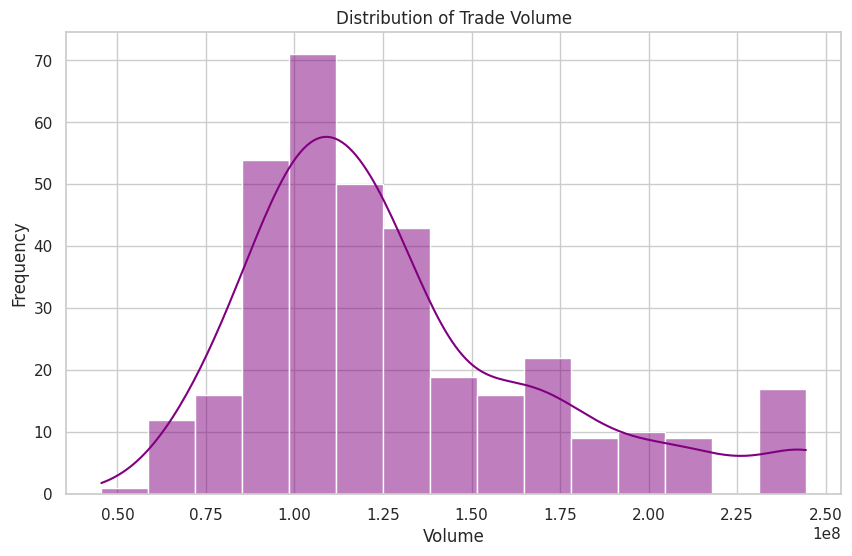

In [17]:
# Plot histogram for Volume
plt.figure(figsize=(10, 6))
sns.histplot(stock['Volume'], kde=True, color="purple")
plt.title("Distribution of Trade Volume")
plt.xlabel("Volume")
plt.ylabel("Frequency")
plt.show()


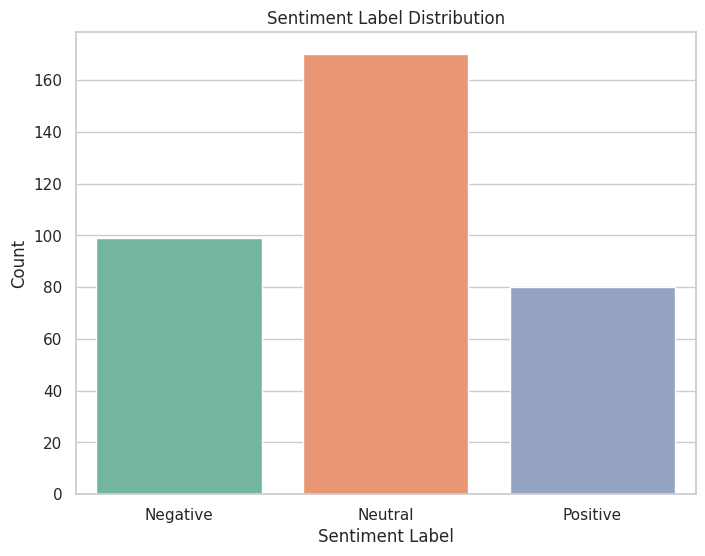

In [18]:
# Plot sentiment label distribution
plt.figure(figsize=(8, 6))
sns.countplot(x="Label", data=stock, palette="Set2")
plt.title("Sentiment Label Distribution")
plt.xlabel("Sentiment Label")
plt.ylabel("Count")
plt.xticks([0, 1, 2], ["Negative", "Neutral", "Positive"])
plt.show()


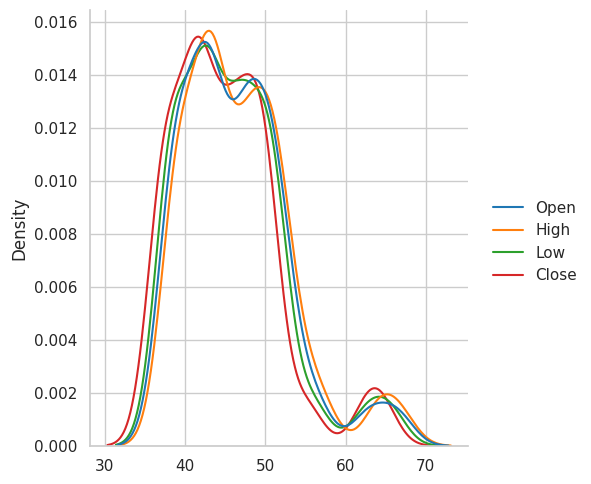

In [19]:
# Density plot for Open, High, Low, Close prices all in a single plot
sns.displot(data=stock[['Open', 'High', 'Low', 'Close']], kind="kde", palette="tab10")

<Axes: xlabel='news_len', ylabel='Count'>

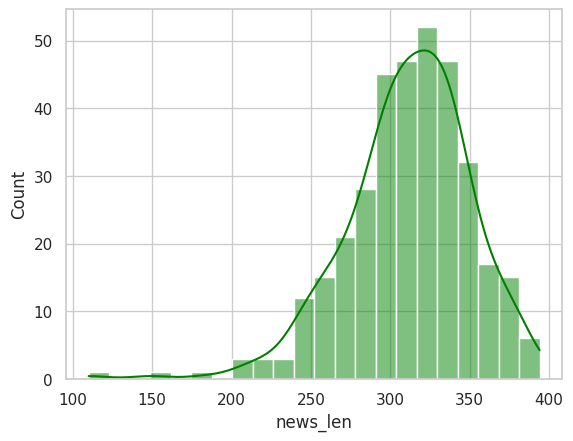

In [20]:
# Create a new column 'news_len' to store the length of each news article
stock['news_len'] = stock['News'].apply(len)

# Histogram for news_len column
sns.histplot(data=stock, x="news_len", color="green", kde=True)

In [21]:
# Calculate the total number of words in the news content
stock['news_len'] = stock['News'].apply(lambda x: len(x.split(' ')))

# Print the statistical summary for the news content length
stock['news_len'].describe()

,news_len
count,349.000000
mean,49.312321
std,5.727770
min,19.000000
25%,46.000000
50%,50.000000
75%,53.000000
max,61.000000


### Bivariate Analysis

These are the different analysis that will be performed

* Correlation between different features
* Sentiment Polarity vs Price
* Date vs Price
* HeatMap
* Time-based Analysis.
  *  Analyze the time-related patterns and trends in the stock data and sentiment over time
  *  Resample the data to a weekly level: Aggregate the stock data (like Open, Close, High, Low, Volume) and sentiment over weekly periods
  *  Relationship between sentiment and stock price trends
  *  Investigating Sentiment Over Time

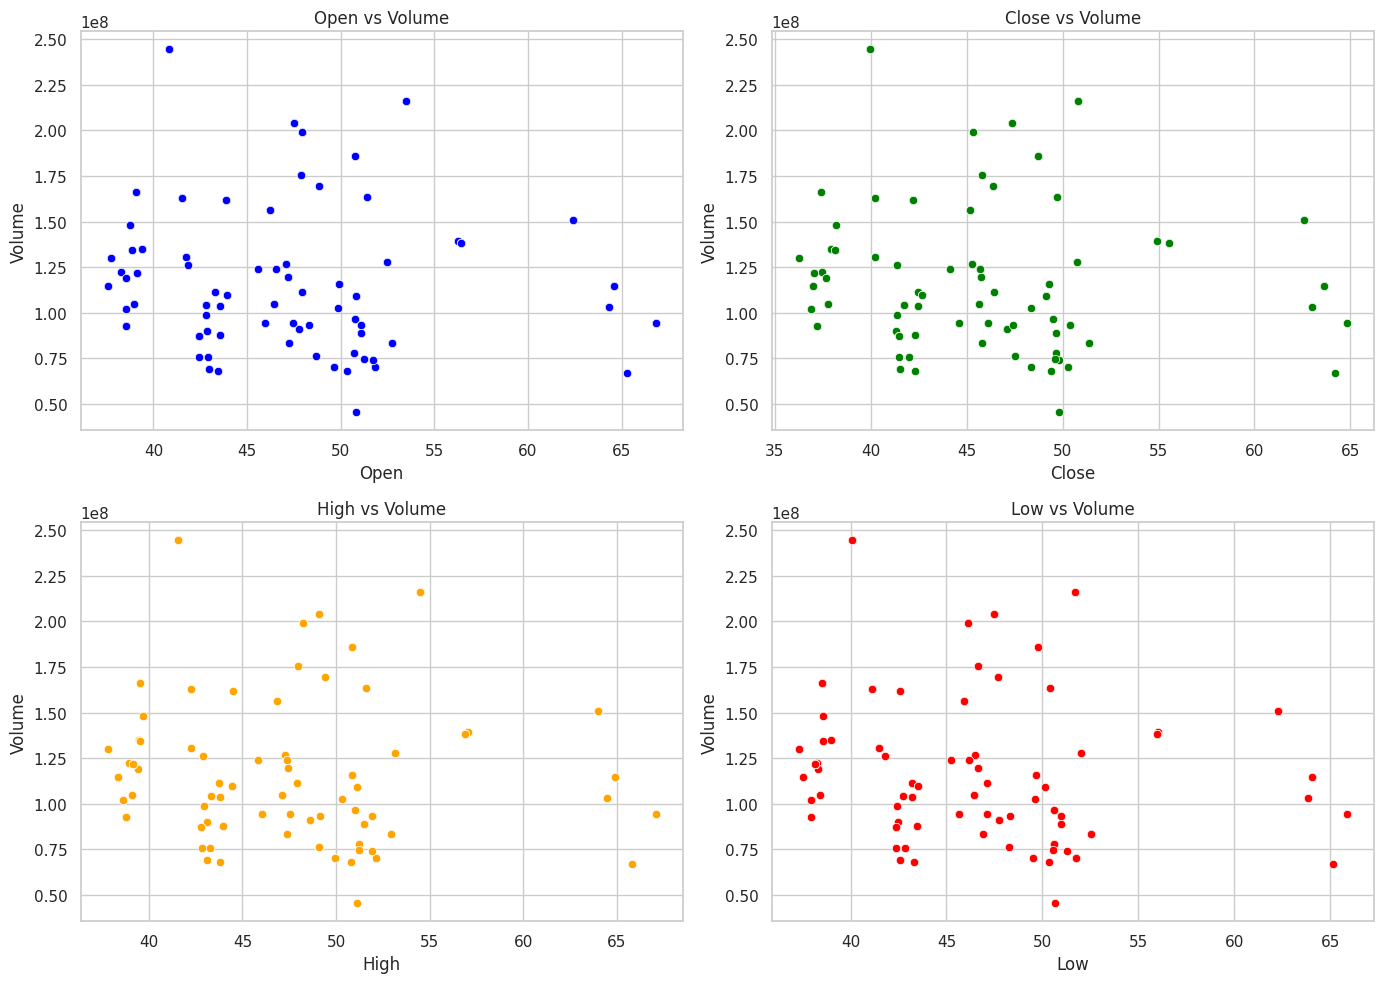

In [22]:
# Scatter plots to see relationships between stock prices and Volume

# We'll first check if there’s any correlation between the stock prices (e.g., Open, Close, High, Low) and Volume.
# We can use a pairplot or scatter plot to visualize this.

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.scatterplot(x=stock['Open'], y=stock['Volume'], ax=axes[0, 0], color="blue")
axes[0, 0].set_title("Open vs Volume")

sns.scatterplot(x=stock['Close'], y=stock['Volume'], ax=axes[0, 1], color="green")
axes[0, 1].set_title("Close vs Volume")

sns.scatterplot(x=stock['High'], y=stock['Volume'], ax=axes[1, 0], color="orange")
axes[1, 0].set_title("High vs Volume")

sns.scatterplot(x=stock['Low'], y=stock['Volume'], ax=axes[1, 1], color="red")
axes[1, 1].set_title("Low vs Volume")

plt.tight_layout()
plt.show()


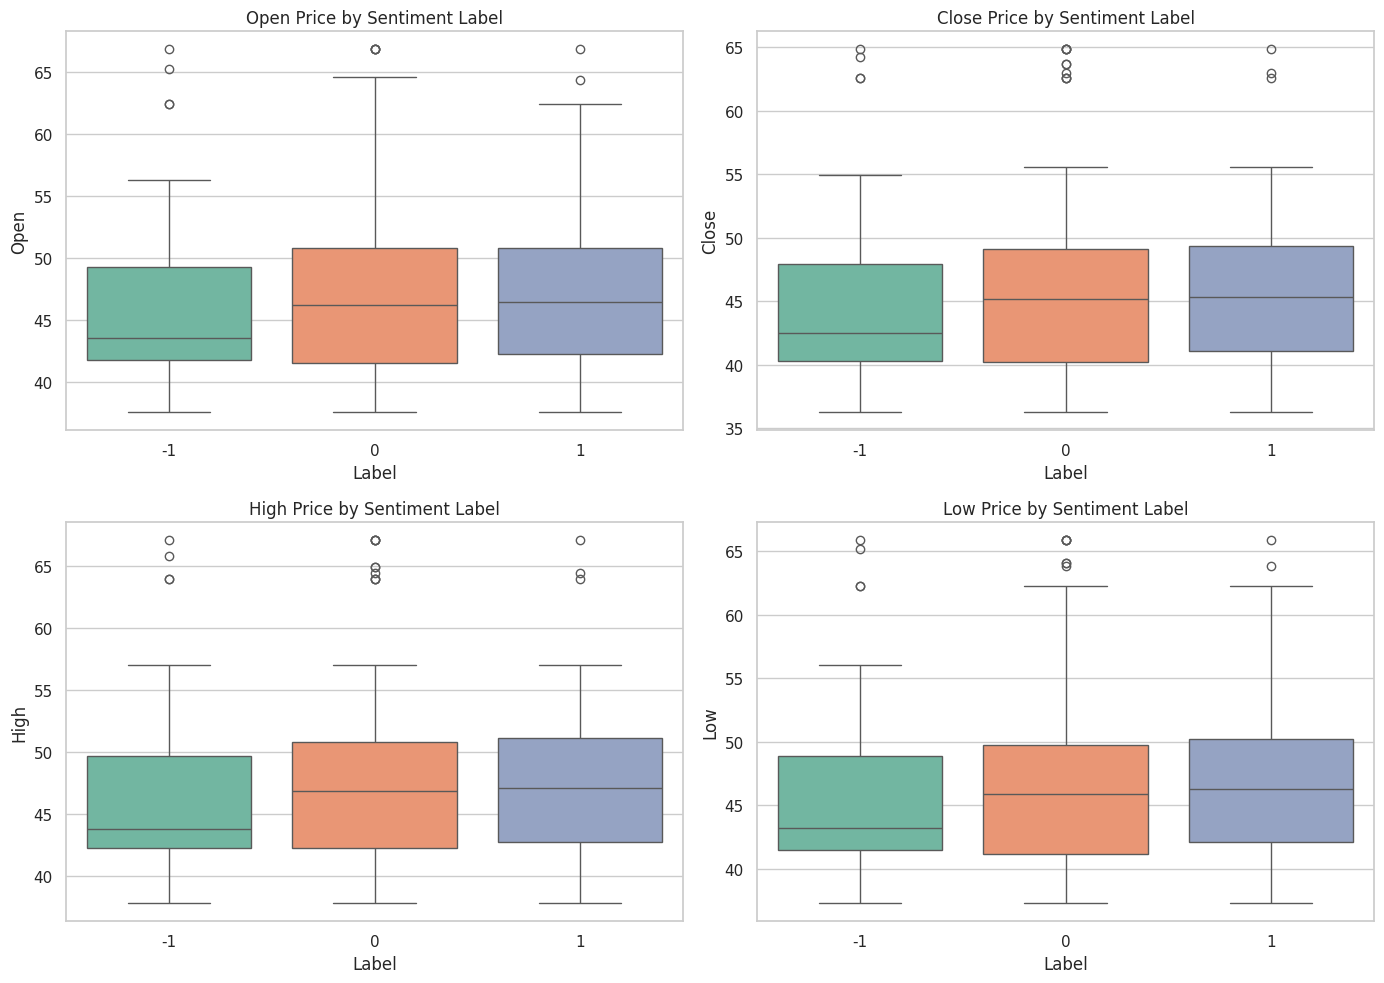

In [24]:
# Correlation Between Sentiment Labels and Stock Prices

# Use a boxplot to explore how the sentiment (Label) affects stock prices (Open, Close, etc.).
# This will help us see whether positive, neutral, or negative news correlates with different stock price behaviors.

# Boxplot to show the distribution of stock prices based on sentiment label

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.boxplot(x=stock['Label'], y=stock['Open'], ax=axes[0, 0], palette="Set2")
axes[0, 0].set_title("Open Price by Sentiment Label")

sns.boxplot(x=stock['Label'], y=stock['Close'], ax=axes[0, 1], palette="Set2")
axes[0, 1].set_title("Close Price by Sentiment Label")

sns.boxplot(x=stock['Label'], y=stock['High'], ax=axes[1, 0], palette="Set2")
axes[1, 0].set_title("High Price by Sentiment Label")

sns.boxplot(x=stock['Label'], y=stock['Low'], ax=axes[1, 1], palette="Set2")
axes[1, 1].set_title("Low Price by Sentiment Label")

plt.tight_layout()
plt.show()

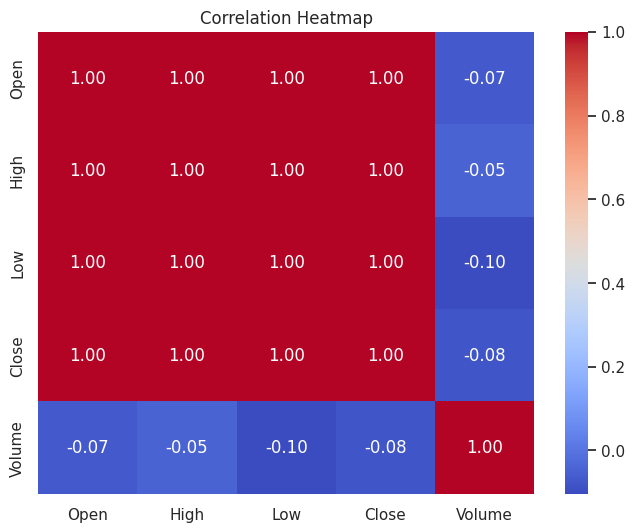

In [25]:
# Correlation Heatmap

# Compute the correlation matrix
correlation_matrix = stock[['Open', 'High', 'Low', 'Close', 'Volume']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Heatmap")
plt.show()


<Axes: xlabel='Label', ylabel='Volume'>

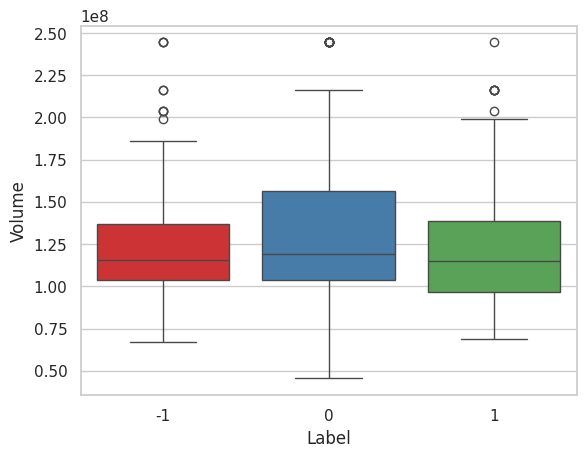

In [26]:
 # Boxplot of Label vs Volume
sns.boxplot(data=stock, x="Label", y="Volume", palette="Set1" )

In [27]:
# Get the start date (earliest date)
start_date = stock['Date'].min()

# Get the end date (latest date)
end_date = stock['Date'].max()

print(f"Start Date: {start_date}")
print(f"End Date: {end_date}")

Start Date: 2019-01-02 00:00:00
End Date: 2019-04-30 00:00:00


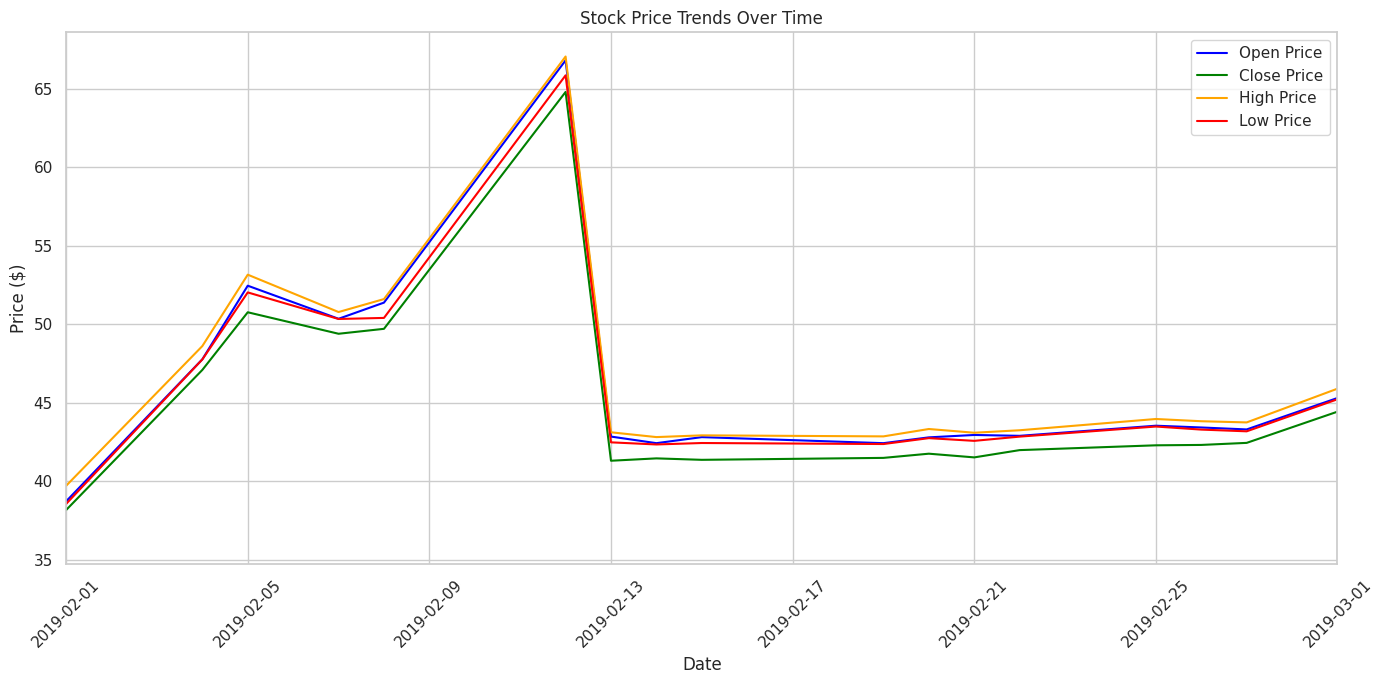

In [29]:
#  Time-based Analysis

# Plotting stock prices over time
plt.figure(figsize=(14, 7))

plt.plot(stock['Date'], stock['Open'], label="Open Price", color="blue")
plt.plot(stock['Date'], stock['Close'], label="Close Price", color="green")
plt.plot(stock['Date'], stock['High'], label="High Price", color="orange")
plt.plot(stock['Date'], stock['Low'], label="Low Price", color="red")

plt.title("Stock Price Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()


# Set the x-axis limits
start_date = pd.to_datetime('2019-02-01')
end_date = pd.to_datetime('2019-03-01')
plt.xlim(start_date, end_date)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

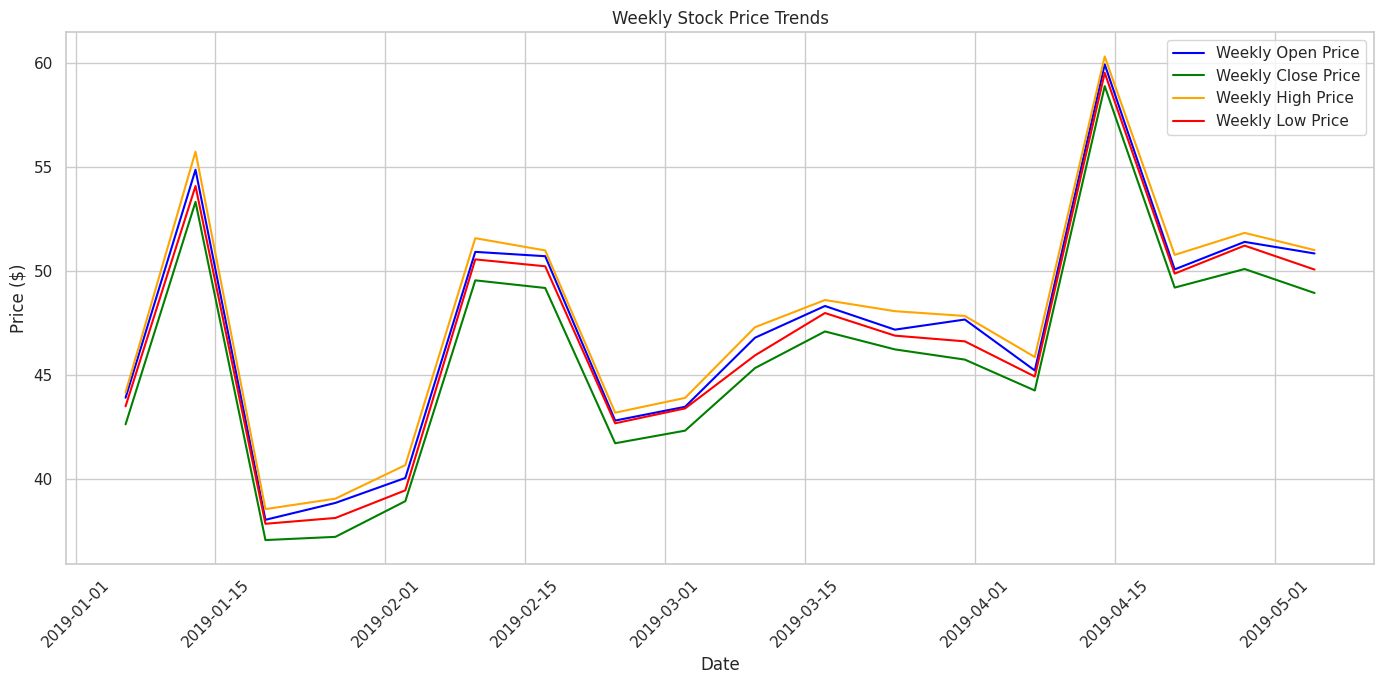

In [30]:
# To perform a time-based analysis, we need to aggregate the data on a weekly basis.
stock.set_index('Date', inplace=True)

# Resample the data to weekly frequency, aggregating with mean for numeric columns
weekly_data = stock[['Open', 'High', 'Low', 'Close', 'Volume']].resample('W').mean()

# Resample sentiment label by mode (most frequent sentiment per week)
weekly_sentiment = stock.resample('W')['Label'].apply(lambda x: x.mode()[0])

# Merge the resampled stock data and sentiment
weekly_data['Label'] = weekly_sentiment

# Now, let's plot the weekly stock price trends
plt.figure(figsize=(14, 7))

plt.plot(weekly_data.index, weekly_data['Open'], label="Weekly Open Price", color="blue")
plt.plot(weekly_data.index, weekly_data['Close'], label="Weekly Close Price", color="green")
plt.plot(weekly_data.index, weekly_data['High'], label="Weekly High Price", color="orange")
plt.plot(weekly_data.index, weekly_data['Low'], label="Weekly Low Price", color="red")

plt.title("Weekly Stock Price Trends")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

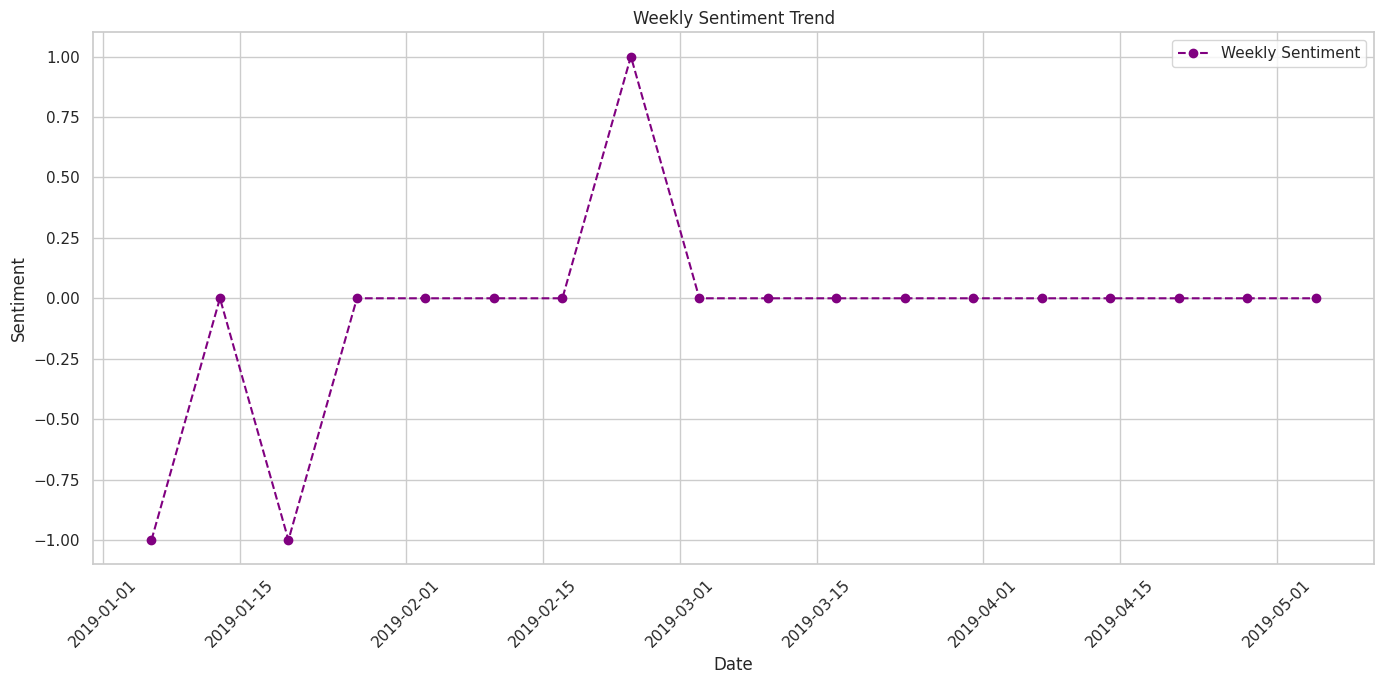

In [31]:
# Investigating Sentiment Over Time. Investigate if there's any relationship between sentiment and stock price trends over time.

# Plot sentiment over time (weekly)
plt.figure(figsize=(14, 7))

# Plot sentiment (1 = Positive, 0 = Neutral, -1 = Negative)
plt.plot(weekly_data.index, weekly_data['Label'], label="Weekly Sentiment", color="purple", marker="o", linestyle="--")

plt.title("Weekly Sentiment Trend")
plt.xlabel("Date")
plt.ylabel("Sentiment")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

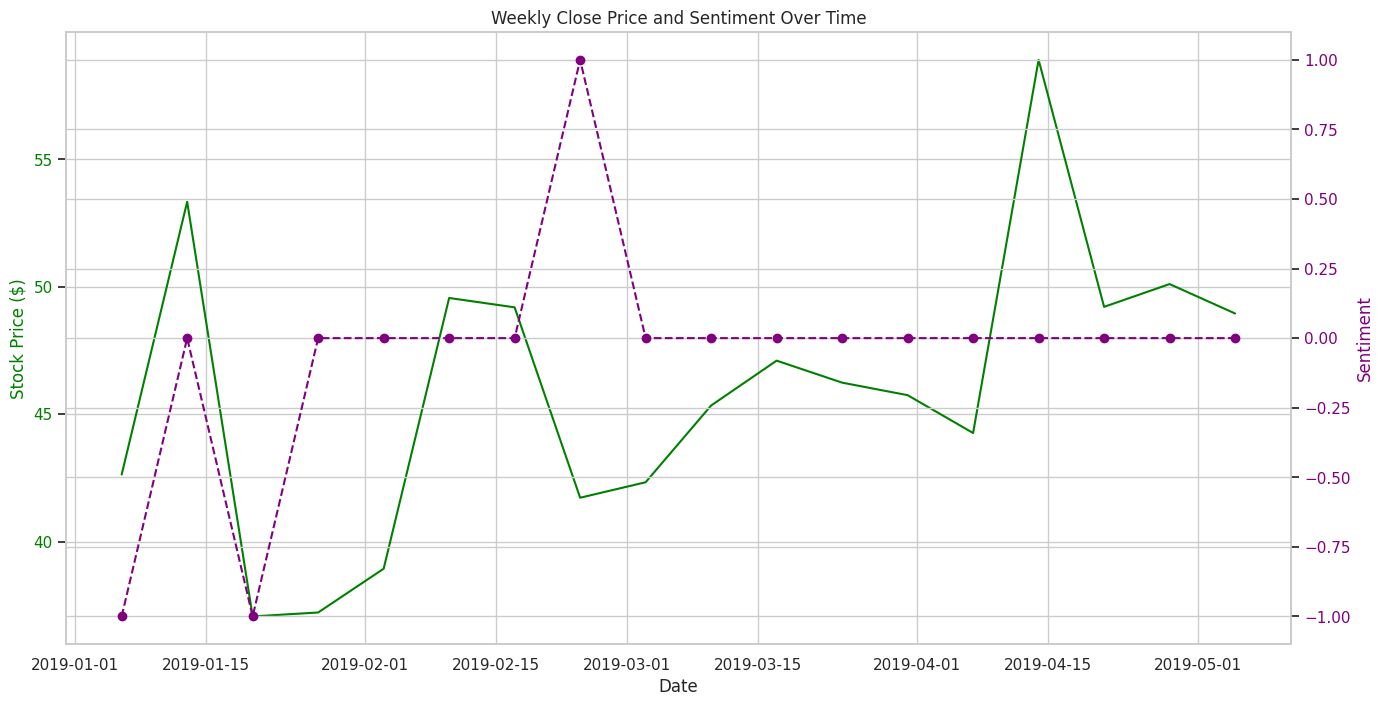

In [32]:
# Sentiment and Stock Price Relationship Over Time

# Plotting both stock price and sentiment over time
fig, ax1 = plt.subplots(figsize=(14, 7))

ax1.plot(weekly_data.index, weekly_data['Close'], label="Weekly Close Price", color="green")
ax1.set_xlabel("Date")
ax1.set_ylabel("Stock Price ($)", color="green")
ax1.tick_params(axis='y', labelcolor="green")

# Create a second y-axis to plot sentiment
ax2 = ax1.twinx()
ax2.plot(weekly_data.index, weekly_data['Label'], label="Weekly Sentiment", color="purple", linestyle="--", marker="o")
ax2.set_ylabel("Sentiment", color="purple")
ax2.tick_params(axis='y', labelcolor="purple")

fig.tight_layout()
plt.title("Weekly Close Price and Sentiment Over Time")
plt.xticks(rotation=45)
plt.show()

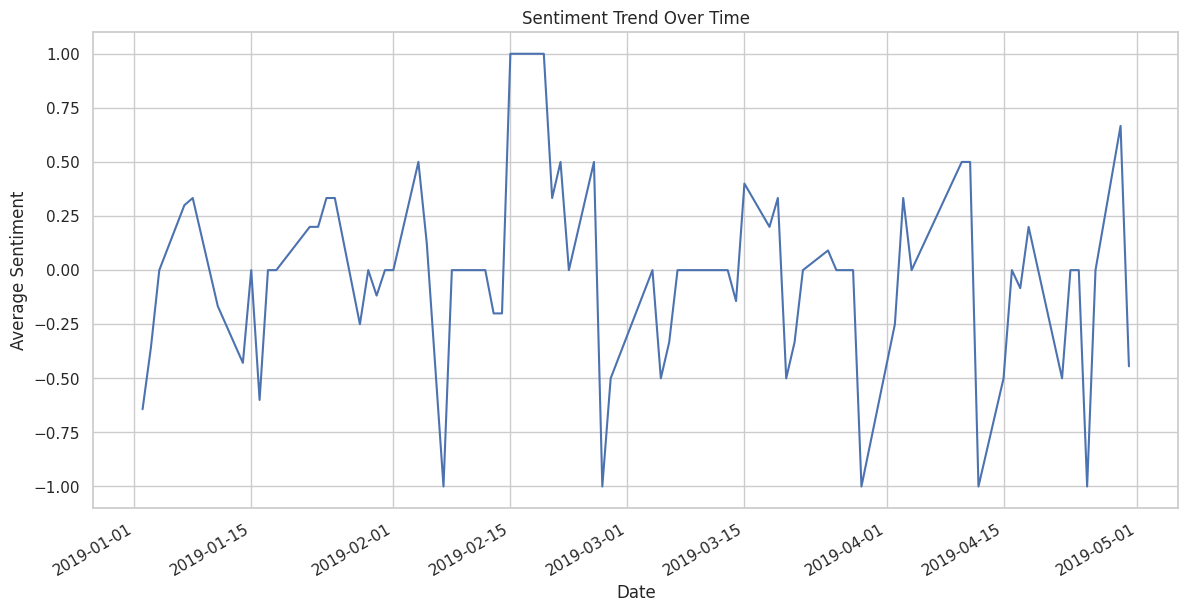

In [33]:
# Sentiment over Time
plt.figure(figsize=(14, 7))
stock.groupby('Date')['Label'].mean().plot()
plt.title('Sentiment Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sentiment')
plt.show()

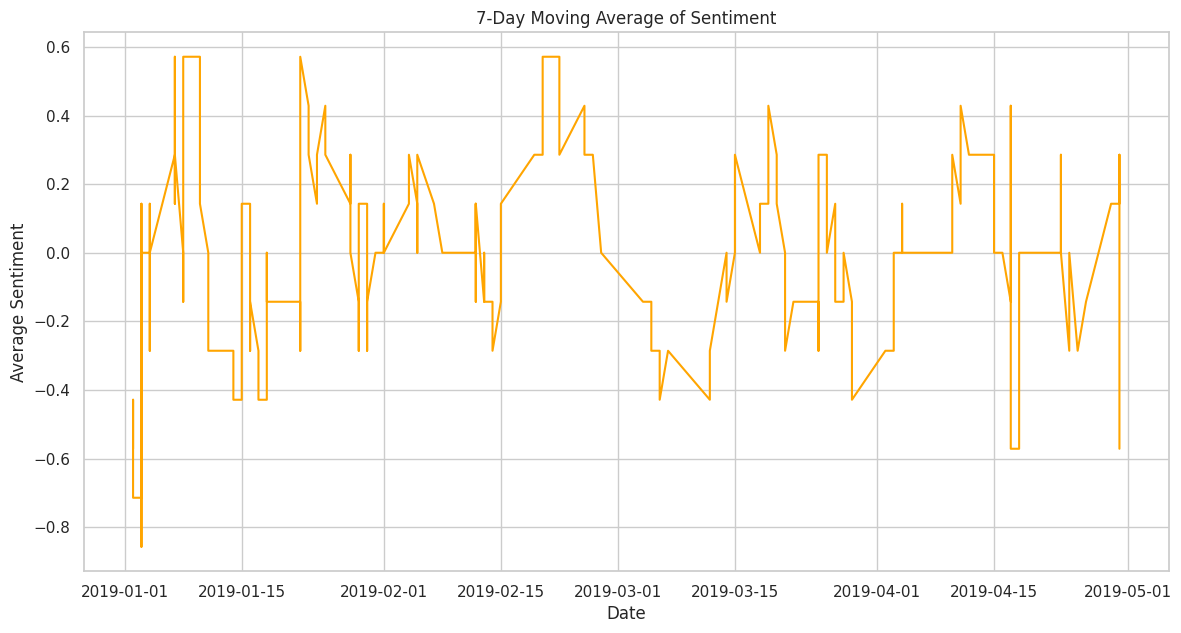

In [35]:
# Calculate a rolling average of sentiment over a 7-day window
stock['Sentiment_MA7'] = stock['Label'].rolling(window=7).mean()

plt.figure(figsize=(14, 7))
plt.plot(stock.index, stock['Sentiment_MA7'], label='7-Day Rolling Sentiment', color='orange')
plt.title('7-Day Moving Average of Sentiment')
plt.xlabel('Date')
plt.ylabel('Average Sentiment')
plt.show()

### Summary of Exploratory Data Analysis

**Univariate Analysis Observations:**

* **Trade Volume:** The distribution of trade volume is right-skewed, with a primary peak around 1.0-1.25 x 10^8. Smaller peaks at higher volumes suggest periods of increased activity.

* **Open Price:** The distribution of open prices appears multimodal with potential peaks in the low 40s and upper 40s/low 50s. There are fewer observations at higher open prices (around 60-65).

* **Close Price:** Similar to open price, the close price distribution is multimodal with peaks in the low 40s and around 50, with a tail towards higher prices.

* **High Price:** The high price distribution also shows multimodality, with peaks in the mid-40s and around the low 50s. Fewer observations exist at higher high prices.

* **Low Price:** The low price distribution is multimodal with peaks in the upper 30s/low 40s and around the mid-40s, with a tail extending to higher low prices.

* **Price Distributions (KDE):** The KDE plot confirms the overlapping and multimodal distributions of Open, High, Low, and Close prices, with primary peaks in the low to mid-40s and upper 40s to low 50s. High prices tend to be slightly higher, and low prices slightly lower.

* **Sentiment Label Distribution:** The sentiment labels are imbalanced, with "Neutral" being the most frequent, followed by "Negative," and "Positive" being the least frequent.


**Bivariate Analysis Observation:**

*  There is no strong linear relationship visually apparent between the trading volume and any of the price points (Open, Close, High, Low).

*  Lower to mid-range prices seem to be associated with a wider range of trading volumes, while higher prices have fewer observations and tend to correspond to lower to moderate volumes in the observed data.

*  There is no strong visual evidence suggesting a significant difference in the central tendency (median) of the Open, Close, High, and Low prices based on the sentiment of the news.

*  The variability (spread) of the prices, as indicated by the IQR, seems broadly similar across the different sentiment labels, although Neutral sentiment might exhibit slightly more price variation in some cases.

*  The presence of outliers in all sentiment categories for all price points indicates that extreme price movements can occur regardless of the news sentiment.

*  The daily stock prices (Open, High, Low, Close) are highly positively correlated with each other.

*  The trading volume shows a very weak negative linear correlation with the stock prices.

*  There is no strong linear relationship observed between the trading volume and the price movements.

*  The median trading volume appears to be slightly higher for Neutral sentiment (Label 0) compared to Negative (Label -1) and Positive (Label 1) sentiment.

*  Negative and Positive sentiment days show a similar median trading volume and a slightly narrower IQR compared to Neutral sentiment

*  Smoothed Trends: As expected, the weekly price trends are much smoother than the daily trends, averaging out the daily volatility.

*  The daily and weekly plots both demonstrate the strong coherence between the Open, Close, High, and Low prices.

*  Similar Price Distributions Across Sentiments (Box Plots): The median and spread of Open, Close, High, and Low prices were broadly similar across negative, neutral, and positive news sentiment categories. Extreme price movements (outliers) occurred regardless of sentiment.

*  Days with neutral news sentiment tended to have a slightly higher median trading volume and greater variability in volume compared to negative or positive sentiment days.

*  While there were some instances where sentiment changes appeared to coincide with price movements in the weekly data, the overall daily and aggregate analyses suggest a weak or complex relationship between news sentiment and stock price and volume in this dataset.

**Sentiment alone does not appear to be a strong direct predictor of price or volume.**




## **Data Preprocessing**

*  Handling Missing Values: As already confirmed, there are no missing values in the dataset

*  Date type : The Date column has been converted to datetime and set as the index, which is necessary for time-based analysis. This is already complete

*  Text Preprocessing steps like lowercasing, stemming, removing stopwords, etc., should be done before word embedding.
  *  Lowercasing: Convert all the text to lowercase to ensure uniformity and avoid treating the same word with different cases
  *  Tokenization: Split the text into individual words (or tokens).
  *  Removing Stopwords: Stopwords (like "the", "and", "is", etc.) are common words that do not carry much meaning and can be removed.
  * Stemming/Lemmatization: These are techniques to reduce words to their base form (e.g., "running" → "run", "better" → "good"). This helps reduce redundancy and standardize the text.
  * Removing Non-Alphabetic Characters: Remove punctuation marks, numbers, and other non-alphabetic characters that may not contribute meaningfully to the text.

In [36]:
stock.reset_index(inplace=True)
stock["Date"].describe()

,Date
count,349
mean,2019-02-16 16:05:30.085959936
min,2019-01-02 00:00:00
25%,2019-01-14 00:00:00
50%,2019-02-05 00:00:00
75%,2019-03-22 00:00:00
max,2019-04-30 00:00:00


## **Steps to be followed**

* Step 1: Split the data into training, validation, and test sets.

* Step 2: Preprocess the text data for training.

* Step 3: Apply Word2Vec, Glove and Transformer to the training data to train the word embeddings.

* Step 4: Preprocess the validation and test sets using the same preprocessing steps as the training set, but without using any information from the validation/test sets.

* Step 5: Apply Apply Word2Vec, Glove and Transformer to the validation and test sets using the word embeddings trained on the training data.

In [37]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

# Download stopwords if not already done
nltk.download('stopwords')

# Initialize stemmer and stopwords list
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [38]:
# Utility Function to preprocess the text
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Tokenization: Split the text into words
    words = text.split()

    # Remove stopwords and non-alphabetic words, and apply stemming
    cleaned_words = []
    for word in words:
        word = ''.join([char for char in word if char.isalpha()])  # Remove non-alphabetic characters
        if word not in stop_words and word != '':
            stemmed_word = stemmer.stem(word)  # Apply stemming
            cleaned_words.append(stemmed_word)

    # Return the cleaned text
    return ' '.join(cleaned_words)

## **Train-Test Split**

Split the data into training, validation, and test sets.

**Note:** It is generally a good and common practice to split time series data into train, validation, and test sets based on time. This approach respects the temporal order of the data, which is crucial for time series forecasting and evaluation.

 If we were to split the data randomly, the training set could contain data from the future relative to your validation or test set. This would allow model to "see the future" during training, leading to unrealistically good performance during evaluation. A time-based split ensures that the model is trained on historical data and evaluated on future data, mimicking real-world forecasting scenarios.

 If we split the time series data using train_test_split from sklearn.model_selection, it shuffles the data randomly before splitting. This is generally not a good practice for time series data

In [39]:
train_cutoff = '2019-03-31'
val_cutoff = '2019-04-15'

X_train = stock[stock['Date'] <= train_cutoff].drop('Label', axis=1) # Features for training
y_train = stock[stock['Date'] <= train_cutoff]['Label']       # Target for training

X_val = stock[(stock['Date'] > train_cutoff) & (stock['Date'] <= val_cutoff)].drop('Label', axis=1) # Features for validation
y_val = stock[(stock['Date'] > train_cutoff) & (stock['Date'] <= val_cutoff)]['Label']       # Target for validation

X_test = stock[stock['Date'] > val_cutoff].drop('Label', axis=1) # Features for testing
y_test = stock[stock['Date'] > val_cutoff]['Label']       # Target for testing

print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Validation set shape: {X_val.shape}, {y_val.shape}")
print(f"Testing set shape: {X_test.shape}, {y_test.shape}")

Training set shape: (286, 9), (286,)
Validation set shape: (21, 9), (21,)
Testing set shape: (42, 9), (42,)


In [40]:
# Apply preprocessing steps (lowercasing, stopword removal, stemming) only to the training data - "New" Column
# Function where preprocessing occures

X_train['cleaned_news'] = X_train["News"].apply(preprocess_text)

# Apply For val and test set as well
X_val['cleaned_news'] = X_val["News"].apply(preprocess_text)
X_test['cleaned_news'] = X_test["News"].apply(preprocess_text)

In [41]:
# Display the first few rows of original and cleaned news for comparison
sample_comparison = X_train[['News', 'cleaned_news']].head(10)  # Display top 10 rows
sample_comparison

,News,cleaned_news
0,"The tech sector experienced a significant decline in the aftermarket following Apple's Q1 revenue warning. Notable suppliers, including Skyworks, Broadcom, Lumentum, Qorvo, and TSMC, saw their stocks drop in response to Apple's downward revision of its revenue expectations for the quarter, previously announced in January.",tech sector experienc signific declin aftermarket follow appl q revenu warn notabl supplier includ skywork broadcom lumentum qorvo tsmc saw stock drop respons appl downward revis revenu expect quarter previous announc januari
1,"Apple lowered its fiscal Q1 revenue guidance to $84 billion from earlier estimates of $89-$93 billion due to weaker than expected iPhone sales. The announcement caused a significant drop in Apple's stock price and negatively impacted related suppliers, leading to broader market declines for tech indices such as Nasdaq 10",appl lower fiscal q revenu guidanc billion earlier estim billion due weaker expect iphon sale announc caus signific drop appl stock price neg impact relat supplier lead broader market declin tech indic nasdaq
2,"Apple cut its fiscal first quarter revenue forecast from $89-$93 billion to $84 billion due to weaker demand in China and fewer iPhone upgrades. CEO Tim Cook also mentioned constrained sales of Airpods and Macbooks. Apple's shares fell 8.5% in post market trading, while Asian suppliers like Hon",appl cut fiscal first quarter revenu forecast billion billion due weaker demand china fewer iphon upgrad ceo tim cook also mention constrain sale airpod macbook appl share fell post market trade asian supplier like hon
3,"This news article reports that yields on long-dated U.S. Treasury securities hit their lowest levels in nearly a year on January 2, 2019, due to concerns about the health of the global economy following weak economic data from China and Europe, as well as the partial U.S. government shutdown. Apple",news articl report yield longdat us treasuri secur hit lowest level nearli year januari due concern health global economi follow weak econom data china europ well partial us govern shutdown appl
4,"Apple's revenue warning led to a decline in USD JPY pair and a gain in Japanese yen, as investors sought safety in the highly liquid currency. Apple's underperformance in Q1, with forecasted revenue of $84 billion compared to analyst expectations of $91.5 billion, triggered risk aversion mood in markets",appl revenu warn led declin usd jpi pair gain japanes yen investor sought safeti highli liquid currenc appl underperform q forecast revenu billion compar analyst expect billion trigger risk avers mood market
5,"Apple CEO Tim Cook discussed the company's Q1 warning on CNBC, attributing US-China trade tensions as a factor. Despite not mentioning iPhone unit sales specifically, Cook indicated Apple may comment on them again. Services revenue is projected to exceed $10.8 billion in Q1. Cook also addressed the lack of",appl ceo tim cook discuss compani q warn cnbc attribut uschina trade tension factor despit mention iphon unit sale specif cook indic appl may comment servic revenu project exceed billion q cook also address lack
6,"Roku Inc has announced plans to offer premium video channels on a subscription basis through its free streaming service, The Roku Channel. Partners include CBS Corp's Showtime, Lionsgate's Starz, and Viacom Inc's Noggin. This model follows Amazon's successful Channels business, which generated an estimated",roku inc announc plan offer premium video channel subscript basi free stream servic roku channel partner includ cb corp showtim lionsgat starz viacom inc noggin model follow amazon success channel busi gener estim
7,"Wall Street saw modest gains on Wednesday but were threatened by fears of a global economic slowdown following Apple's shocking revenue forecast cut, blaming weak demand in China. The tech giant's suppliers and S&P 500 futures also suffered losses. Reports of decelerating factory activity in China and 

In [42]:
X_train

,Date,News,Open,High,Low,Close,Volume,news_len,Sentiment_MA7,cleaned_news
0,2019-01-02,"The tech sector experienced a significant decline in the aftermarket following Apple's Q1 revenue warning. Notable suppliers, including Skyworks, Broadcom, Lumentum, Qorvo, and TSMC, saw their stocks drop in response to Apple's downward revision of its revenue expectations for the quarter, previously announced in January.",41.740002,42.244999,41.482498,40.246914,130672400,46,NaN,tech sector experienc signific declin aftermarket follow appl q revenu warn notabl supplier includ skywork broadcom lumentum qorvo tsmc saw stock drop respons appl downward revis revenu expect quarter previous announc januari
1,2019-01-02,"Apple lowered its fiscal Q1 revenue guidance to $84 billion from earlier estimates of $89-$93 billion due to weaker than expected iPhone sales. The announcement caused a significant drop in Apple's stock price and negatively impacted related suppliers, leading to broader market declines for tech indices such as Nasdaq 10",41.740002,42.244999,41.482498,40.246914,130672400,51,NaN,appl lower fiscal q revenu guidanc billion earlier estim billion due weaker expect iphon sale announc caus signific drop appl stock price neg impact relat supplier lead broader market declin tech indic nasdaq
2,2019-01-02,"Apple cut its fiscal first quarter revenue forecast from $89-$93 billion to $84 billion due to weaker demand in China and fewer iPhone upgrades. CEO Tim Cook also mentioned constrained sales of Airpods and Macbooks. Apple's shares fell 8.5% in post market trading, while Asian suppliers like Hon",41.740002,42.244999,41.482498,40.246914,130672400,49,NaN,appl cut fiscal first quarter revenu forecast billion billion due weaker demand china fewer iphon upgrad ceo tim cook also mention constrain sale airpod macbook appl share fell post market trade asian supplier like hon
3,2019-01-02,"This news article reports that yields on long-dated U.S. Treasury securities hit their lowest levels in nearly a year on January 2, 2019, due to concerns about the health of the global economy following weak economic data from China and Europe, as well as the partial U.S. government shutdown. Apple",41.740002,42.244999,41.482498,40.246914,130672400,51,NaN,news articl report yield longdat us treasuri secur hit lowest level nearli year januari due concern health global economi follow weak econom data china europ well partial us govern shutdown appl
4,2019-01-02,"Apple's revenue warning led to a decline in USD JPY pair and a gain in Japanese yen, as investors sought safety in the highly liquid currency. Apple's underperformance in Q1, with forecasted revenue of $84 billion compared to analyst expectations of $91.5 billion, triggered risk aversion mood in markets",41.740002,42.244999,41.482498,40.246914,130672400,50,NaN,appl revenu warn led declin usd jpi pair gain japanes yen investor sought safeti highli liquid currenc appl underperform q forecast revenu billion compar analyst expect billion trigger risk avers mood market
5,2019-01-02,"Apple CEO Tim Cook discussed the company's Q1 warning on CNBC, attributing US-China trade tensions as a factor. Despite not mentioning iPhone unit sales specifically, Cook indicated Apple may comment on them again. Services revenue is projected to exceed $10.8 billion in Q1. Cook also addressed the lack of",41.740002,42.244999,41.482498,40.246914,130672400,49,NaN,appl ceo tim cook discuss compani q warn cnbc attribut uschina trade tension factor despit mention iphon unit sale specif cook indic appl may comment servic revenu project exceed billion q cook also address lack
6,2019-01-02,"Roku Inc has announced plans to offer premium video channels on a subscription basis through its free streaming service, The Roku Channel. Partners include CBS Corp's Showtime, Lionsgate's Starz, and Viacom Inc's Noggin. This model follows Amazon's successful Channels business, which generated an estimated",41.740002,42.244999,41.482498,40.246914,130672

Pre-process the training data and apply the same to validation & test data

## **Word Embeddings**

As we are working with text data in the News column, we need to convert the text data into numerical features using word embeddings.

Word2Vec will beused for word embedding. Word2Vec will transform each word in the "cleaned" news text into a dense vector of real numbers that represent its meaning in a multi-dimensional space. This ensures semantically similar words will have similar vector representations

In [43]:
tokenized_sentences_train = [news.split() for news in X_train['cleaned_news']]
# Do the same for Val and Test Data as well
tokenized_sentences_val = [news.split() for news in X_val['cleaned_news']]
tokenized_sentences_test = [news.split() for news in X_test['cleaned_news']]

In [44]:
# Sample 4 records after the cleaned_news was tokenized

for i, tokens in enumerate(tokenized_sentences_train[:4]):
    print(f"News {i+1}: {tokens}\n")

News 1: ['tech', 'sector', 'experienc', 'signific', 'declin', 'aftermarket', 'follow', 'appl', 'q', 'revenu', 'warn', 'notabl', 'supplier', 'includ', 'skywork', 'broadcom', 'lumentum', 'qorvo', 'tsmc', 'saw', 'stock', 'drop', 'respons', 'appl', 'downward', 'revis', 'revenu', 'expect', 'quarter', 'previous', 'announc', 'januari']

News 2: ['appl', 'lower', 'fiscal', 'q', 'revenu', 'guidanc', 'billion', 'earlier', 'estim', 'billion', 'due', 'weaker', 'expect', 'iphon', 'sale', 'announc', 'caus', 'signific', 'drop', 'appl', 'stock', 'price', 'neg', 'impact', 'relat', 'supplier', 'lead', 'broader', 'market', 'declin', 'tech', 'indic', 'nasdaq']

News 3: ['appl', 'cut', 'fiscal', 'first', 'quarter', 'revenu', 'forecast', 'billion', 'billion', 'due', 'weaker', 'demand', 'china', 'fewer', 'iphon', 'upgrad', 'ceo', 'tim', 'cook', 'also', 'mention', 'constrain', 'sale', 'airpod', 'macbook', 'appl', 'share', 'fell', 'post', 'market', 'trade', 'asian', 'supplier', 'like', 'hon']

News 4: ['news',

### **Word2Vec Embedding**

In [45]:
# Train Word2Vec model
w2v_model = Word2Vec(
    sentences=tokenized_sentences_train,
    vector_size=300,
    window=5,
    min_count=1,
    workers=6,
    sg=1
)

In [46]:
# Checking the size of the vocabulary
print("Length of the vocabulary is", len(list(w2v_model.wv.key_to_index)))

Length of the vocabulary is 2203


**Why Average ?:**

Why Use the Average Word2Vec Vector for Sentence Representation?

When working with Word2Vec embeddings, there are two common approaches to represent a sentence: embedding each word individually, or averaging the vectors of all words in the sentence.

In this project, we use the average Word2Vec vector for each sentence. This choice offers several practical advantages:

* Fixed-Length Representation: Averaging yields a single fixed-size vector regardless of sentence length, making it compatible with traditional ML models like logistic regression or SVM.

* Simplicity and Speed: It is computationally efficient and memory-friendly, especially useful when working with large datasets or simple classification tasks.

* Captures General Meaning: While it ignores word order, the average embedding often retains the overall semantic meaning of the sentence, which is sufficient for many tasks such as clustering, topic modeling, or basic sentiment analysis.

However, it’s important to acknowledge the limitations:

* Word order is lost (e.g., “not good” and “good not” produce the same vector).

* It lacks contextual nuance and may dilute the importance of key terms.

* Despite these trade-offs, averaging Word2Vec vectors remains a strong baseline for sentence-level representation when efficiency and simplicity are key.

In [47]:
# Function to get the average Word2Vec vector for a sentence (Approach 2)
def average_vectorizer_Word2Vec(doc, model):
    feature_vector = np.zeros(model.vector_size, dtype="float64")
    words_in_vocab = [word for word in doc.split() if word in model.wv]
    if words_in_vocab:
        feature_vector = np.mean([model.wv[word] for word in words_in_vocab], axis=0)
    return feature_vector

In [48]:
# Create averaged Word2Vec vectors for training, validation, and test sets
X_train_wv = pd.DataFrame(X_train['cleaned_news'].apply(lambda x: average_vectorizer_Word2Vec(x, w2v_model)).tolist())
X_val_wv = pd.DataFrame(X_val['cleaned_news'].apply(lambda x: average_vectorizer_Word2Vec(x, w2v_model)).tolist())
X_test_wv = pd.DataFrame(X_test['cleaned_news'].apply(lambda x: average_vectorizer_Word2Vec(x, w2v_model)).tolist())

In [49]:
# Sample 4 records after the cleaned_news was tokenized
for i in range(4):
    print(f"News {i+1}: {X_train_wv.iloc[i].values}\n")

News 1: [-3.91680095e-03  1.02105543e-01  1.39927668e-02  5.13960980e-02
 -1.68821551e-02 -9.54169184e-02  8.08177069e-02  1.83067948e-01
  1.12077147e-02  2.04953528e-03 -2.93561853e-02 -7.19085708e-02
 -7.28637818e-03  2.00012582e-03 -6.95532784e-02 -8.01953673e-02
  4.30664234e-02 -1.60932299e-02 -1.08579854e-02 -9.13652498e-03
 -5.72082102e-02  7.14701926e-03  4.60475534e-02  4.43300158e-02
  9.05866921e-02 -2.15611217e-05 -1.04993910e-01 -1.59298759e-02
 -7.04625025e-02 -8.54857787e-02  3.16118225e-02 -3.22851501e-02
  2.75068395e-02  1.05694646e-03 -1.80033520e-02  5.09149097e-02
  3.96196023e-02 -8.63521844e-02  1.36927683e-02  1.32249538e-02
 -6.92229643e-02  6.41317165e-05  2.97579099e-03 -8.99477080e-02
  4.90006469e-02  6.78162575e-02  2.85733454e-02  2.87520885e-02
 -1.52900927e-02  5.60989082e-02  2.64418814e-02  1.55642126e-02
 -5.34906723e-02  2.83456370e-02 -1.81641839e-02  8.55649710e-02
  2.11622752e-02 -6.45684730e-03  1.94600932e-02  1.54627988e-03
 -2.87681893e-02 

### **GloVe Embedding**

In [50]:
# load the Stanford GloVe model from this link : https://nlp.stanford.edu/projects/glove/
# Convert GloVe to word2vec format using glove2word2vec
from gensim.scripts.glove2word2vec import glove2word2vec

glove_file_path = '/content/drive/MyDrive/PGP-AIML/Machine Learning/Project6_NLP/glove.6B.300d.txt'
word2vec_file_path = '/content/drive/MyDrive/PGP-AIML/Machine Learning/Project6_NLP/glove.6B.300d.word2vec.txt'

# Convert GloVe format to word2vec format
glove2word2vec(glove_file_path, word2vec_file_path)

glove_model = KeyedVectors.load_word2vec_format(word2vec_file_path, binary=False)

embedding_dim_glove = glove_model.vector_size # Get the embedding dimension from the loaded model


# Checking the size of the vocabulary
print("Length of the vocabulary is", len(glove_model.index_to_key))

Length of the vocabulary is 400000


In [58]:
def average_vectorizer_GloVe_gensim(doc, model, dim):
    """
    Computes the average GloVe vector for a given document.

    This function takes a sentence (or document), tokenizes it, and returns a single
    fixed-size feature vector by averaging the GloVe vectors of the words present in the model's vocabulary.

    Parameters:
        doc (str): The input text/document.
        model (gensim.KeyedVectors): Preloaded GloVe embeddings in Gensim format.
        dim (int): Dimensionality of the GloVe vectors.

    Returns:
        numpy.ndarray: A 1D array representing the average GloVe embedding for the input document.
    """
    feature_vector = np.zeros(dim, dtype="float64")
    words_in_vocab = [word for word in doc.split() if word in model.key_to_index]
    if words_in_vocab:
        feature_vector = np.mean([model[word] for word in words_in_vocab], axis=0)
    return feature_vector

In [59]:
# Create averaged GloVe vectors for training, validation, and test sets
X_train_glove = pd.DataFrame(X_train['cleaned_news'].apply(lambda x: average_vectorizer_GloVe_gensim(x, glove_model, embedding_dim_glove)).tolist())
X_val_glove = pd.DataFrame(X_val['cleaned_news'].apply(lambda x: average_vectorizer_GloVe_gensim(x, glove_model, embedding_dim_glove)).tolist())
X_test_glove = pd.DataFrame(X_test['cleaned_news'].apply(lambda x: average_vectorizer_GloVe_gensim(x, glove_model, embedding_dim_glove)).tolist())

print(X_train_glove.shape)
print(X_val_glove.shape)
print(X_test_glove.shape)

(286, 300)
(21, 300)
(42, 300)


## **Sentence Transformer Embedding**

The SentenceTransformer embeddings are already fixed in size, so there is no need to pad them, unlike with Word2Vec or GloVe where padding may be needed if the number of words in each sentence is different.

In [60]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

In [55]:
# Generate sentence embeddings for the 'cleaned_news' column
X_train_st = model.encode(X_train['cleaned_news'].tolist(), show_progress_bar=True)

#apply the same to Val and Test dataset as well
X_val_st = model.encode(X_val['cleaned_news'].tolist(), show_progress_bar=True)
X_test_st = model.encode(X_test['cleaned_news'].tolist(), show_progress_bar=True)

print(X_train_st.shape)
print(X_val_st.shape)
print(X_test_st.shape)

Batches:   0%|          | 0/9 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

(286, 384)
(21, 384)
(42, 384)


In [61]:
print('-----------------------Summary of Embeddings-----------------------\n')
print("Word2Vec Embeddings:")
print(f"  - Training data shape: {X_train_wv.shape}")
print(f"  - Embedding dimension (based on model training): {w2v_model.vector_size}")
print("\nGloVe Embeddings:")
print(f"  - Training data shape: {X_train_glove.shape}")
print(f"  - Embedding dimension (pre-defined): {embedding_dim_glove}") # Or glove_model.vector_size if using gensim
print("\nSentence Transformer Embeddings:")
print(f"  - Training data shape: {X_train_st.shape}")
print(f"  - Embedding dimension (model-specific): {X_train_st.shape[1]}")

-----------------------Summary of Embeddings-----------------------

Word2Vec Embeddings:
  - Training data shape: (286, 300)
  - Embedding dimension (based on model training): 300

GloVe Embeddings:
  - Training data shape: (286, 300)
  - Embedding dimension (pre-defined): 300

Sentence Transformer Embeddings:
  - Training data shape: (286, 384)
  - Embedding dimension (model-specific): 384


### **Model Development**

The below function takes a trained classification model, the predictor features, and the true target labels as input. It then generates and displays a confusion matrix, which is a visual representation of the model's performance in terms of true positives, true negatives, false positives, and false negatives 1  for each class

#### Utility Functions

In [62]:
def plot_confusion_matrix(model, predictors, target):
    """
    Plot a confusion matrix to visualize the performance of a classification model.

    Parameters:
    actual (array-like): The true labels.
    predicted (array-like): The predicted labels from the model.

    Returns:
    None: Displays the confusion matrix plot.
    """
    pred = model.predict(predictors)  # Make predictions using the classifier.

    cm = confusion_matrix(target, pred)  # Compute the confusion matrix.

    plt.figure(figsize=(5, 4))  # Create a new figure with a specified size.
    label_list = [0, 1,-1]  # Define the labels for the confusion matrix.
    sns.heatmap(cm, annot=True, fmt='.0f', cmap='Blues', xticklabels=label_list, yticklabels=label_list)
    # Plot the confusion matrix using a heatmap with annotations.

    plt.ylabel('Actual')  # Label for the y-axis.
    plt.xlabel('Predicted')  # Label for the x-axis.
    plt.title('Confusion Matrix')  # Title of the plot.
    plt.show()  # Display the plot.

This function below also takes a trained classification model, predictors, and target labels. It calculates several common classification metrics using scikit-learn: accuracy, weighted recall, weighted precision, and weighted F1-score. It then returns these metrics in a pandas DataFrame.

In [63]:
def model_performance_classification_sklearn(model, predictors, target):
    """
    Compute various performance metrics for a classification model using sklearn.

    Parameters:
    model (sklearn classifier): The classification model to evaluate.
    predictors (array-like): The independent variables used for predictions.
    target (array-like): The true labels for the dependent variable.

    Returns:
    pandas.DataFrame: A DataFrame containing the computed metrics (Accuracy, Recall, Precision, F1-score).
    """
    pred = model.predict(predictors)  # Make predictions using the classifier.

    acc = accuracy_score(target, pred)  # Compute Accuracy.
    recall = recall_score(target, pred,average='weighted')  # Compute Recall.
    precision = precision_score(target, pred,average='weighted')  # Compute Precision.
    f1 = f1_score(target, pred,average='weighted')  # Compute F1-score.

    # Create a DataFrame to store the computed metrics.
    df_perf = pd.DataFrame(
        {
            "Accuracy": [acc],
            "Recall": [recall],
            "Precision": [precision],
            "F1": [f1],
        }
    )

    return df_perf  # Return the DataFrame with the metrics.

## **Sentiment Analysis**

#### Metric Selection

For sentiment analysis (with classes: negative, neutral, positive), several metrics are important. I would prefer look at these four and also look at the confusion matrix before making a selection


*  Accuracy: The percentage of correctly classified predictions out of all predictions made.

*  Precision: The proportion of instances the model predicted as that sentiment that were actually that sentiment. It focuses on the correctness of positive predictions.

*  Recall: For each specific sentiment class, the proportion of actual instances of that sentiment that the model correctly identified. It focuses on the model's ability to find all instances of a given sentiment.

*  F1-Score: The harmonic mean of precision and recall for each sentiment class, providing a balanced measure of the model's performance on that class. It's particularly useful when there's an imbalance between precision and recall.

* Confusion Matrix – This is very helpful for visualizing how the model is handling each class. For instance, you can see how often "neutral" is being confused with "positive" or "negative."

### Model Building : Base Model : Word2Vec

#### RandomForestClassifier

In [64]:
base_wv_rfc = RandomForestClassifier(random_state=42)
base_wv_rfc.fit(X_train_wv, y_train)

RandomForestClassifier(random_state=42)

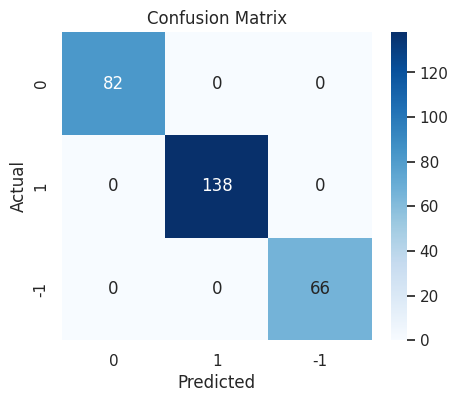

In [65]:
plot_confusion_matrix(base_wv_rfc,X_train_wv,y_train)

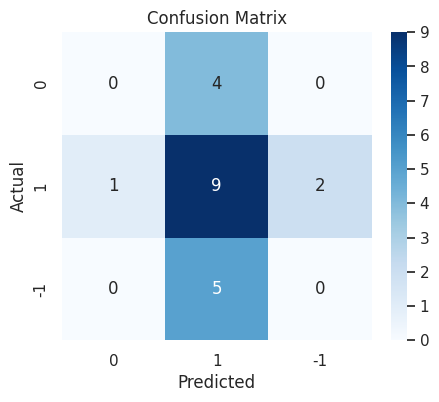

In [66]:
plot_confusion_matrix(base_wv_rfc,X_val_wv,y_val)

In [67]:
#Calculating different metrics on training data
base_train_wv_rfc = model_performance_classification_sklearn(base_wv_rfc,X_train_wv,y_train)
print("Training performance:\n", base_train_wv_rfc)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [68]:
#Calculating different metrics on validation data
base_val_wv_rfc = model_performance_classification_sklearn(base_wv_rfc,X_val_wv,y_val)
print("Validation performance:\n",base_val_wv_rfc)

Validation performance:
    Accuracy    Recall  Precision        F1
0  0.428571  0.428571   0.285714  0.342857


### Model Building : Base Model : GloVe

#### RandomForestClassifier

In [69]:
base_gl_rfc = RandomForestClassifier(random_state=42)
base_gl_rfc.fit(X_train_glove, y_train)

RandomForestClassifier(random_state=42)

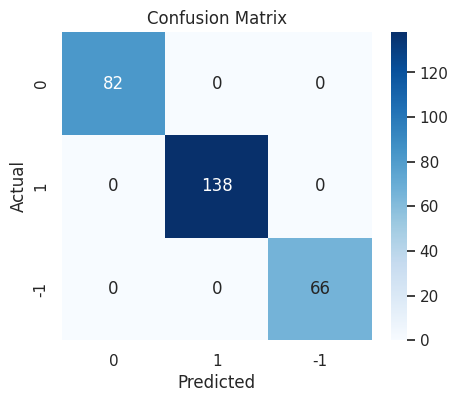

In [70]:
plot_confusion_matrix(base_gl_rfc,X_train_glove,y_train)

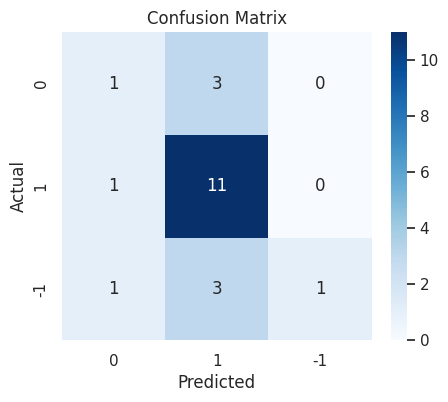

In [71]:
plot_confusion_matrix(base_gl_rfc,X_val_glove,y_val)

In [72]:
#Calculating different metrics on training data
base_train_gl_rfc = model_performance_classification_sklearn(base_gl_rfc,X_train_glove,y_train)
print("Training performance:\n", base_train_gl_rfc)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [73]:
#Calculating different metrics on validation data
base_val_gl_rfc = model_performance_classification_sklearn(base_gl_rfc,X_val_glove,y_val)
print("Validation performance:\n",base_val_gl_rfc)

Validation performance:
    Accuracy    Recall  Precision        F1
0  0.619048  0.619048   0.671335  0.567284


### Model Building : Base Model : Sentence Transformer

#### RandomForestClassifier

In [74]:
base_st_rfc = RandomForestClassifier(random_state=42)
base_st_rfc.fit(X_train_st, y_train)

RandomForestClassifier(random_state=42)

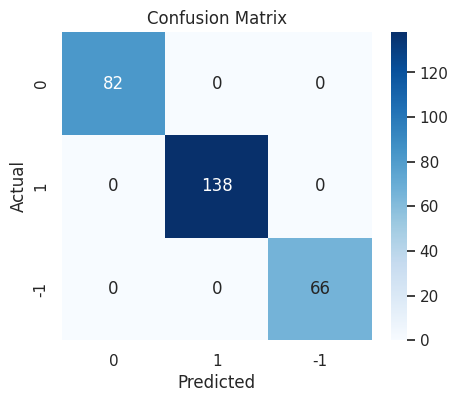

In [75]:
plot_confusion_matrix(base_st_rfc,X_train_st,y_train)

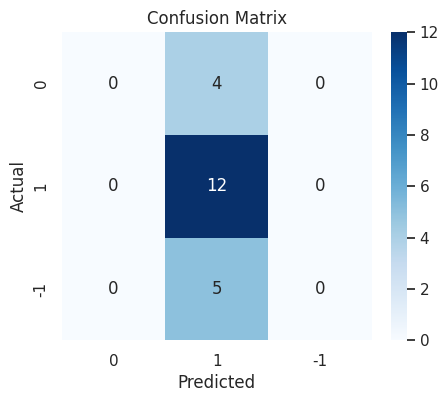

In [76]:
plot_confusion_matrix(base_st_rfc,X_val_st,y_val)

In [77]:
#Calculating different metrics on training data
base_train_st_rfc = model_performance_classification_sklearn(base_st_rfc,X_train_st,y_train)
print("Training performance:\n", base_train_st_rfc)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [78]:
#Calculating different metrics on validation data
base_val_st_rfc = model_performance_classification_sklearn(base_st_rfc,X_val_st,y_val)
print("Validation performance:\n",base_val_st_rfc)

Validation performance:
    Accuracy    Recall  Precision        F1
0  0.571429  0.571429   0.326531  0.415584


### **Fine Tuning**


We have established a baseline performance for each embedding technique using a RandomForestClassifier and observed that GloVe seems to have yielded the best initial results on your validation set.

Now, the next crucial step is hyperparameter tuning for each of these models (one for each embedding type: Word2Vec, GloVe, and Sentence Transformer). This process involves systematically searching for the optimal set of hyperparameters for each model that maximizes its performance on the validation set.



### Model Building : Tuned Model : Word2Vec

In [79]:
start = time.time()

# Define the hyperparameter grid for RandomForestClassifier
parameters_wv = {
    'max_depth': np.arange(3,7),
    'min_samples_split': np.arange(5,12,2),
    'max_features': ['log2', 'sqrt', 0.2, 0.4]
}

# Run the grid search for base_wv_rfc
grid_obj1 = GridSearchCV(base_wv_rfc, parameters_wv, scoring='f1_weighted',cv=5,n_jobs=-1)
grid_obj1 = grid_obj1.fit(X_train_wv, y_train)

end = time.time()
print("Time taken ",(end-start))

# Set the clf to the best combination of parameters
tuned_wv_rfc = grid_obj1.best_estimator_

Time taken  33.932361125946045


In [80]:
# Fit the best algorithm to the data.
tuned_wv_rfc.fit(X_train_wv, y_train)

RandomForestClassifier(max_depth=6, max_features=0.4, min_samples_split=11,
                       random_state=42)

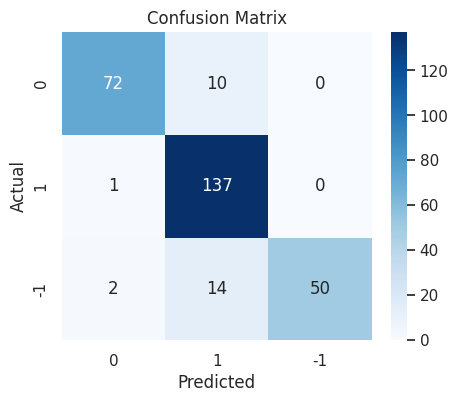

In [81]:
plot_confusion_matrix(tuned_wv_rfc,X_train_wv,y_train)

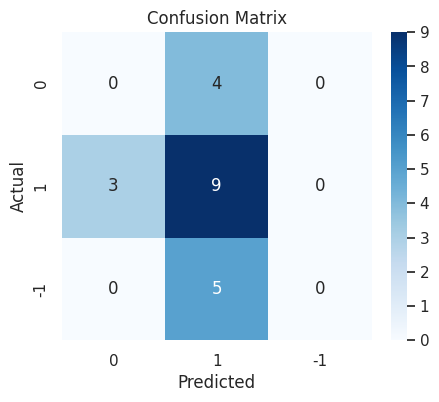

In [82]:
plot_confusion_matrix(tuned_wv_rfc,X_val_wv,y_val)

In [83]:
#Calculating different metrics on training data
tuned_train_wv=model_performance_classification_sklearn(tuned_wv_rfc,X_train_wv,y_train)
print("Training performance:\n",tuned_train_wv)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.905594  0.905594   0.916603  0.904085


In [84]:
#Calculating different metrics on validation data
tuned_val_wv = model_performance_classification_sklearn(tuned_wv_rfc,X_val_wv,y_val)

print("Validation performance:\n",tuned_val_wv)

Validation performance:
    Accuracy    Recall  Precision        F1
0  0.428571  0.428571   0.285714  0.342857


### Model Building : Tuned Model : GloVe

In [85]:
start2 = time.time()

# Define the hyperparameter grid for RandomForestClassifier
parameters_gl = {
    'max_depth': np.arange(3,7),
    'min_samples_split': np.arange(5,12,2),
    'max_features': ['log2', 'sqrt', 0.2, 0.4]
}

# Run the grid search for base_gl_rfc
grid_obj2 = GridSearchCV(base_gl_rfc, parameters_gl, scoring='f1_weighted',cv=5,n_jobs=-1)
grid_obj2 = grid_obj2.fit(X_train_glove, y_train)

end2 = time.time()
print("Time taken ",(end2-start2))

# Set the clf to the best combination of parameters
tuned_gl_rfc = grid_obj2.best_estimator_

Time taken  32.35235595703125


In [86]:
# Fit the best algorithm to the data.
tuned_gl_rfc.fit(X_train_glove, y_train)

RandomForestClassifier(max_depth=6, max_features=0.2, min_samples_split=5,
                       random_state=42)

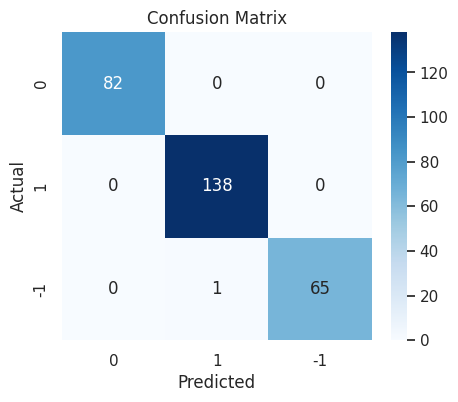

In [87]:
plot_confusion_matrix(tuned_gl_rfc,X_train_glove,y_train)

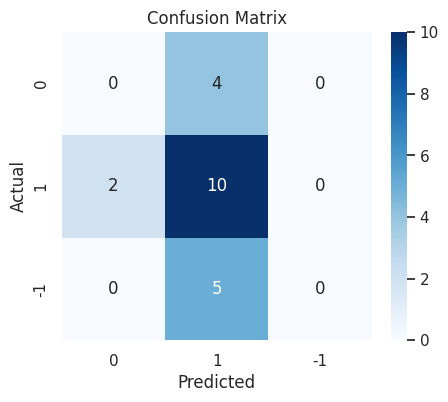

In [88]:
plot_confusion_matrix(tuned_gl_rfc,X_val_glove,y_val)

In [89]:
#Calculating different metrics on training data
tuned_train_gl=model_performance_classification_sklearn(tuned_gl_rfc,X_train_glove,y_train)
print("Training performance:\n",tuned_train_gl)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.996503  0.996503   0.996529  0.996496


In [90]:
#Calculating different metrics on validation data
tuned_val_gl = model_performance_classification_sklearn(tuned_gl_rfc,X_val_glove,y_val)
print("Validation performance:\n",tuned_val_gl)

Validation performance:
    Accuracy   Recall  Precision        F1
0   0.47619  0.47619   0.300752  0.368664


In [91]:
print("Best Word2Vec hyperparameters:", grid_obj1.best_params_)
print("Best GloVe hyperparameters:", grid_obj2.best_params_)

Best Word2Vec hyperparameters: {'max_depth': 6, 'max_features': 0.4, 'min_samples_split': 11}
Best GloVe hyperparameters: {'max_depth': 6, 'max_features': 0.2, 'min_samples_split': 5}


### Model Building : Tuned Model : Sentence Transformer

In [92]:
start = time.time()

# Define the hyperparameter grid for RandomForestClassifier
parameters = {
    'max_depth': np.arange(3,7),
    'min_samples_split': np.arange(5,12,2),
    'max_features': ['log2', 'sqrt', 0.2, 0.4]
}

# Run the grid search for base_gl_rfc
grid_obj3 = GridSearchCV(base_st_rfc, parameters, scoring='f1_weighted',cv=5,n_jobs=-1)
grid_obj3 = grid_obj3.fit(X_train_st, y_train)

end = time.time()
print("Time taken ",(end-start))

# Set the clf to the best combination of parameters
tuned_st_rfc = grid_obj3.best_estimator_

Time taken  38.08988046646118


In [93]:
# Fit the best algorithm to the data.
tuned_st_rfc.fit(X_train_st, y_train)

RandomForestClassifier(max_depth=6, max_features=0.4, min_samples_split=7,
                       random_state=42)

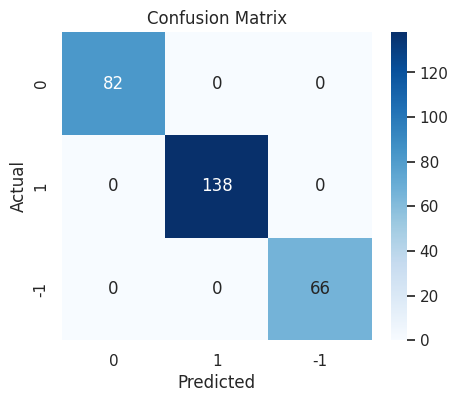

In [94]:
plot_confusion_matrix(tuned_st_rfc,X_train_st,y_train)

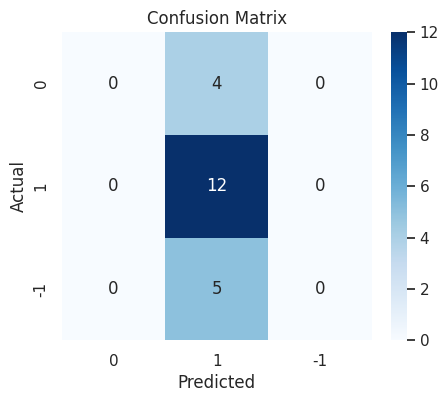

In [95]:
plot_confusion_matrix(tuned_st_rfc,X_val_st,y_val)

In [96]:
#Calculating different metrics on training data
tuned_train_st=model_performance_classification_sklearn(tuned_st_rfc,X_train_st,y_train)
print("Training performance:\n",tuned_train_st)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [97]:
#Calculating different metrics on validation data
tuned_val_st = model_performance_classification_sklearn(tuned_st_rfc,X_val_st,y_val)
print("Validation performance:\n",tuned_val_st)

Validation performance:
    Accuracy    Recall  Precision        F1
0  0.571429  0.571429   0.326531  0.415584


## **Model Comparison**

In [98]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import pandas as pd

def evaluate_model_tabular(model, X_val, y_val, model_name):
    """
    Evaluates a trained classification model and returns performance metrics in a dictionary.
    """
    y_pred = model.predict(X_val)
    metrics = {
        'Model': model_name,
        'Accuracy': round(accuracy_score(y_val, y_pred), 4),
        'F1-Score (Weighted)': round(f1_score(y_val, y_pred, average='weighted'), 4),
        'Precision (Weighted)': round(precision_score(y_val, y_pred, average='weighted'), 4),
        'Recall (Weighted)': round(recall_score(y_val, y_pred, average='weighted'), 4)
    }
    return metrics

results = []

# Evaluate the models
results.append(evaluate_model_tabular(base_wv_rfc, X_val_wv, y_val, "Base Word2Vec (RandomForest)"))
results.append(evaluate_model_tabular(base_gl_rfc, X_val_glove, y_val, "Base GloVe (RandomForest)"))
results.append(evaluate_model_tabular(base_st_rfc, X_val_st, y_val, "Base Sentence Transformer (RandomForest)"))

results.append(evaluate_model_tabular(tuned_wv_rfc, X_val_wv, y_val, "Tuned Word2Vec (RandomForest)"))
results.append(evaluate_model_tabular(tuned_gl_rfc, X_val_glove, y_val, "Tuned GloVe (RandomForest)"))
results.append(evaluate_model_tabular(tuned_st_rfc, X_val_st, y_val, "Tuned Sentence Transformer  (RandomForest)"))

# Uncomment below to evaluate other models
# results.append(evaluate_model_tabular(tuned_glove, X_val_glove, y_val, "Tuned GloVe (RF)"))
# results.append(evaluate_model_tabular(tuned_st, X_val_st, y_val, "Tuned ST (RF)"))

# Create a DataFrame for clean tabular format
df_results = pd.DataFrame(results)
df_results.set_index("Model", inplace=True)

# Display results
print(df_results.to_markdown())  # Nicely formatted in terminal output

| Model                                      |   Accuracy |   F1-Score (Weighted) |   Precision (Weighted) |   Recall (Weighted) |
|:-------------------------------------------|-----------:|----------------------:|-----------------------:|--------------------:|
| Base Word2Vec (RandomForest)               |     0.4286 |                0.3429 |                 0.2857 |              0.4286 |
| Base GloVe (RandomForest)                  |     0.619  |                0.5673 |                 0.6713 |              0.619  |
| Base Sentence Transformer (RandomForest)   |     0.5714 |                0.4156 |                 0.3265 |              0.5714 |
| Tuned Word2Vec (RandomForest)              |     0.4286 |                0.3429 |                 0.2857 |              0.4286 |
| Tuned GloVe (RandomForest)                 |     0.4762 |                0.3687 |                 0.3008 |              0.4762 |
| Tuned Sentence Transformer  (RandomForest) |     0.5714 |                0.4156 |

In [99]:
#training performance comparison

models_train_comp_df = pd.concat(
    [base_train_wv_rfc.T,
     base_train_gl_rfc.T,
     base_train_st_rfc.T,
     tuned_train_wv.T,
     tuned_train_gl.T,
     tuned_train_st.T,
    ],axis=1
)

models_train_comp_df.columns = [
    "Base Model (Word2Vec)",
    "Base Model (GloVe)",
    "Base Model (Sentence Transformer)",
    "Tuned Model (Word2Vec)",
    "Tuned Model (GloVe)",
    "Tuned Model (Sentence Transformer)",
]

print("Training performance comparison:")
models_train_comp_df.T

Training performance comparison:


,Accuracy,Recall,Precision,F1
Base Model (Word2Vec),1.000000,1.000000,1.000000,1.000000
Base Model (GloVe),1.000000,1.000000,1.000000,1.000000
Base Model (Sentence Transformer),1.000000,1.000000,1.000000,1.000000
Tuned Model (Word2Vec),0.905594,0.905594,0.916603,0.904085
Tuned Model (GloVe),0.996503,0.996503,0.996529,0.996496
Tuned Model (Sentence Transformer),1.000000,1.000000,1.000000,1.000000


In [100]:
#validation performance comparison

models_val_comp_df = pd.concat(
    [base_val_wv_rfc.T,
     base_val_gl_rfc.T,
     base_val_st_rfc.T,
     tuned_val_wv.T,
     tuned_val_gl.T,
     tuned_val_st.T,
     ],axis=1
)

models_val_comp_df.columns = [
    "Base Model (Word2Vec)",
    "Base Model (GloVe)",
    "Base Model (Sentence Transformer)",
    "Tuned Model (Word2Vec)",
    "Tuned Model (GloVe)",
    "Tuned Model (Sentence Transformer)",
]

print("Validation performance comparison:")
models_val_comp_df.T

Validation performance comparison:


,Accuracy,Recall,Precision,F1
Base Model (Word2Vec),0.428571,0.428571,0.285714,0.342857
Base Model (GloVe),0.619048,0.619048,0.671335,0.567284
Base Model (Sentence Transformer),0.571429,0.571429,0.326531,0.415584
Tuned Model (Word2Vec),0.428571,0.428571,0.285714,0.342857
Tuned Model (GloVe),0.476190,0.476190,0.300752,0.368664
Tuned Model (Sentence Transformer),0.571429,0.571429,0.326531,0.415584


### **Final Model Selection**

Looking at the validation metrics, the Base Model (GloVe) consistently outperforms all other models across most metric

* Highest Accuracy (0.6190): This means it has the highest overall correct predictions on the unseen validation data before any hyperparameter tuning.
* Highest Recall (0.6190): It's the best at correctly identifying instances of each sentiment class.
* Highest Precision (0.6713): When the Base GloVe model predicts a certain sentiment, it's more likely to be correct compared to the other base models.
* Highest F1-Score (0.5673): The F1-score provides a balanced measure of precision and recall, and Base GloVe has the highest value here.

In [101]:
# Evaluate the Base GloVe model on the test set
print("\n--------Test Performance of Base GloVe Model --------\n")
test_performance_glove = model_performance_classification_sklearn(base_gl_rfc, X_test_glove, y_test)
print(test_performance_glove)


--------Test Performance of Base GloVe Model --------

   Accuracy  Recall  Precision        F1
0       0.5     0.5   0.446574  0.355113


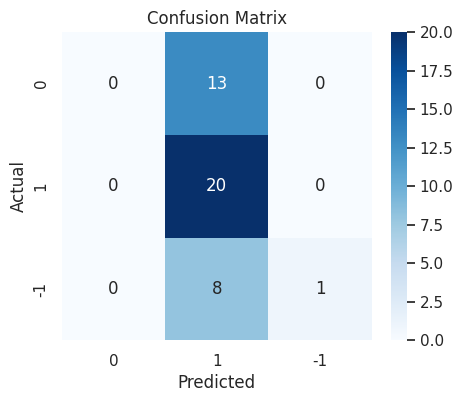

In [102]:
#Confusion matrix for the test set
plot_confusion_matrix(base_gl_rfc, X_test_glove, y_test)

## **Weekly News Summarization**

**Important Note**: It is recommended to run this section of the project independently from the previous sections in order to avoid runtime crashes due to RAM overload.

#### Installing and Importing the necessary libraries

In [103]:
# Installation for GPU llama-cpp-python
# uncomment and run the following code in case GPU is being used
!CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 pip install llama-cpp-python==0.2.45 --force-reinstall --no-cache-dir -q


# Installation for CPU llama-cpp-python
# uncomment and run the following code in case GPU is not being used
#!CMAKE_ARGS="-DLLAMA_CUBLAS=off" FORCE_CMAKE=1 pip install llama-cpp-python -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.7/36.7 MB 78.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 160.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 259.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.9/134.9 kB 356.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 353.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 284.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.4 

In [104]:
# Function to download the model from the Hugging Face model hub
from huggingface_hub import hf_hub_download

# Importing the Llama class from the llama_cpp module
from llama_cpp import Llama

# Importing the library for data manipulation
import pandas as pd

from tqdm import tqdm # For progress bar related functionalities
tqdm.pandas()

#### Loading the data

In [105]:
stock_news = pd.read_csv('/content/drive/MyDrive/PGP-AIML/Machine Learning/Project6_NLP/stock_news.csv')

#Creating a copy of the dataset
data = stock_news.copy()

#### Loading the model

In [106]:
model_name_or_path = "TheBloke/Mistral-7B-Instruct-v0.2-GGUF"
model_basename = "mistral-7b-instruct-v0.2.Q6_K.gguf"

In [107]:
#download
model_path = hf_hub_download(repo_id=model_name_or_path, filename=model_basename)

mistral-7b-instruct-v0.2.Q6_K.gguf:   0%|          | 0.00/5.94G [00:00<?, ?B/s]

In [108]:
llm = Llama(
    model_path=model_path, # Path to the model
    n_gpu_layers=100, #Number of layers transferred to GPU
    n_ctx=4500, #Context window
)

llama_model_loader: loaded meta data with 24 key-value pairs and 291 tensors from /root/.cache/huggingface/hub/models--TheBloke--Mistral-7B-Instruct-v0.2-GGUF/snapshots/3a6fbf4a41a1d52e415a4958cde6856d34b2db93/mistral-7b-instruct-v0.2.Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = llama
llama_model_loader: - kv   1:                               general.name str              = mistralai_mistral-7b-instruct-v0.2
llama_model_loader: - kv   2:                       llama.context_length u32              = 32768
llama_model_loader: - kv   3:                     llama.embedding_length u32              = 4096
llama_model_loader: - kv   4:                          llama.block_count u32              = 32
llama_model_loader: - kv   5:                  llama.feed_forward_length u32              = 14336
llama_model_loade

#### Aggregating the data weekly

In [109]:
data["Date"] = pd.to_datetime(data['Date'])  # Convert the 'Date' column to datetime format.

In [110]:
# Group the data by week using the 'Date' column.
weekly_grouped = data.groupby(pd.Grouper(key='Date', freq='W'))

In [111]:
weekly_grouped = weekly_grouped.agg(
    {
        'News': lambda x: ' || '.join(x)  # Join the news values with ' || ' separator.
    }
).reset_index()

print(weekly_grouped.shape)

(18, 2)


In [112]:
weekly_grouped

Date  \
0  2019-01-06   
1  2019-01-13   
2  2019-01-20   
3  2019-01-27   
4  2019-02-03   
5  2019-02-10   
6  2019-02-17   
7  2019-02-24   
8  2019-03-03   
9  2019-03-10   
10 2019-03-17   
11 2019-03-24   
12 2019-03-31   
13 2019-04-07   
14 2019-04-14   
15 2019-04-21   
16 2019-04-28   
17 2019-05-05   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [113]:
# creating a copy of the data
data_1 = weekly_grouped.copy()

#### Summarization

**Note**:

- The model is expected to summarize the news from the week by identifying the top three positive and negative events that are most likely to impact the price of the stock.

- As an output, the model is expected to return a JSON containing two keys, one for Positive Events and one for Negative Events.

For the project, we need to define the prompt to be fed to the LLM to help it understand the task to perform. The following should be the components of the prompt:

1. **Role**: Specifies the role the LLM will be taking up to perform the specified task, along with any specific details regarding the role

  - **Example**: `You are an expert data analyst specializing in news content analysis.`

2. **Task**: Specifies the task to be performed and outlines what needs to be accomplished, clearly defining the objective

  - **Example**: `Analyze the provided news headline and return the main topics contained within it.`

3. **Instructions**: Provides detailed guidelines on how to perform the task, which includes steps, rules, and criteria to ensure the task is executed correctly

  - **Example**:

```
Instructions:
1. Read the news headline carefully.
2. Identify the main subjects or entities mentioned in the headline.
3. Determine the key events or actions described in the headline.
4. Extract relevant keywords that represent the topics.
5. List the topics in a concise manner.
```

4. **Output Format**: Specifies the format in which the final response should be structured, ensuring consistency and clarity in the generated output

  - **Example**: `Return the output in JSON format with keys as the topic number and values as the actual topic.`

**Full Prompt Example**:

```
You are an expert data analyst specializing in news content analysis.

Task: Analyze the provided news headline and return the main topics contained within it.

Instructions:
1. Read the news headline carefully.
2. Identify the main subjects or entities mentioned in the headline.
3. Determine the key events or actions described in the headline.
4. Extract relevant keywords that represent the topics.
5. List the topics in a concise manner.

Return the output in JSON format with keys as the topic number and values as the actual topic.
```

**Sample Output**:

`{"1": "Politics", "2": "Economy", "3": "Health" }`

#### Utility Functions

In [114]:
# defining a function to parse the JSON output from the model
def extract_json_data(json_str):
    import json
    try:
        # Find the indices of the opening and closing curly braces
        json_start = json_str.find('{')
        json_end = json_str.rfind('}')

        if json_start != -1 and json_end != -1:
            extracted_category = json_str[json_start:json_end + 1]  # Extract the JSON object
            data_dict = json.loads(extracted_category)
            return data_dict
        else:
            print(f"Warning: JSON object not found in response: {json_str}")
            return {}
    except json.JSONDecodeError as e:
        print(f"Error parsing JSON: {e}")
        return {}

In [115]:
#Defining the response function
def response_mistral_1(prompt, news):
    model_output = llm(
      f"""
      [INST]
      {prompt}
      News Articles: {news}
      [/INST]
      """,
      max_tokens=1024,     # Reasonable length for extracting 3 positive and 3 negative events
      temperature=0.7,     # Balanced creativity
      top_p=0.9,           # Nucleus sampling - considers top 90% probability mass
      top_k=40,            # Limits sampling to top 40 options
      echo=False,
    )

    final_output = model_output["choices"][0]["text"]
    return final_output

Below is the Prompt that will be used for genrating the response from the LLM.

Define the instruction for the task (the task is to identify the top three positive and negative events from the week that are likely to impact the stock price)

In [116]:
role = """You are a financial news analyst specializing in summarizing and categorizing market-moving events."""
task = """Your task is to read through the provided financial and business news summaries and identify the top three **positive** and top three **negative** events from the week."""
instructions = """For each event, write a short headline and a brief explanation of its impact. Think in terms of how it would affect markets, sentiment, or specific sectors. Be concise and analytical."""
output_format = """
Output Format (JSON only):
{
  "Positive Events": [
    {"Event": "Event headline here", "Reasoning": "Short explanation"},
    ...
  ],
  "Negative Events": [
    {"Event": "Event headline here", "Reasoning": "Short explanation"},
    ...
  ]
}

IMPORTANT: Return ONLY the JSON. Do not include commentary, prose, or introductory text.
"""

formatted_prompt = f"""{role}

{task}

{instructions}

{output_format}

Weekly News:

"""


### Model Execution

##### **Checking the model output on a sample data**

**Note**: Use this section to test out the prompt with one instance before using it for the entire weekly data.

In [117]:
# Grab one sample week
sample_row = data_1.iloc[0]
sample_news = sample_row["News"]
sample_date = sample_row["Date"]

In [118]:
# Now pass the formatted prompt to the model
sample_response = response_mistral_1(formatted_prompt, sample_news)


llama_print_timings:        load time =     594.76 ms
llama_print_timings:      sample time =     202.51 ms /   395 runs   (    0.51 ms per token,  1950.48 tokens per second)
llama_print_timings: prompt eval time =    5191.46 ms /  3973 tokens (    1.31 ms per token,   765.30 tokens per second)
llama_print_timings:        eval time =   19339.05 ms /   394 runs   (   49.08 ms per token,    20.37 tokens per second)
llama_print_timings:       total time =   26102.91 ms /  4367 tokens


In [119]:
# Print the raw output in JSON Format
print("Raw model output:\n", sample_response)

Raw model output:
  {
          "Positive Events": [
            {
              "Event": "Roku Inc announces plans for premium video channels on The Roku Channel",
              "Reasoning": "Roku's move to offer premium video channels follows Amazon's successful Channels business model, potentially increasing revenue streams for the company."
            },
            {
              "Event": "FDIC Chair expresses no concern over market volatility affecting US banking system",
              "Reasoning": "FDIC Chair's statement reassures investors about the stability of the US banking system amidst market volatility."
            },
            {
              "Event": "Chinese central bank announces fifth reduction in required reserve ratio for banks",
              "Reasoning": "The reduction in required reserve ratio for banks will free up approximately 116.5 billion yuan for new lending, potentially boosting economic growth in China."
            }
          ],
          "Negativ

In [120]:
# Extract the JSON response
parsed_data = extract_json_data(sample_response)

# Display structured results
print("\nStructured result:")
print("Week:", sample_date)

# Format Positive Events
print("\nPositive Events:")
positive_events = parsed_data.get("Positive Events", [])
for i, event in enumerate(positive_events[:3], 1):  # Top 3
    print(f"{i}. {event['Event']}")
    print(f"   Reasoning: {event['Reasoning']}")

# Format Negative Events
print("\nNegative Events:")
negative_events = parsed_data.get("Negative Events", [])
for i, event in enumerate(negative_events[:3], 1):  # Top 3
    print(f"{i}. {event['Event']}")
    print(f"   Reasoning: {event['Reasoning']}")



Structured result:
Week: 2019-01-06 00:00:00

Positive Events:
1. Roku Inc announces plans for premium video channels on The Roku Channel
   Reasoning: Roku's move to offer premium video channels follows Amazon's successful Channels business model, potentially increasing revenue streams for the company.
2. FDIC Chair expresses no concern over market volatility affecting US banking system
   Reasoning: FDIC Chair's statement reassures investors about the stability of the US banking system amidst market volatility.
3. Chinese central bank announces fifth reduction in required reserve ratio for banks
   Reasoning: The reduction in required reserve ratio for banks will free up approximately 116.5 billion yuan for new lending, potentially boosting economic growth in China.

Negative Events:
1. Apple lowers quarterly revenue forecast, blaming weak demand in China
   Reasoning: Apple's revenue warning negatively impacts not only its own stock but also related suppliers, leading to broader ma

##### **Checking the model output on the weekly data**

In [121]:
# Apply the response generation and extract the structured output for the entire result across all weeks.

results = []

for i, row in data_1.iterrows():
    news = row['News']
    week = row['Date']

    model_response = response_mistral_1(formatted_prompt, news)
    json_data = extract_json_data(model_response)

    results.append({
        "Week": week,
        "News": news,
        "Positive Events": json_data.get("Positive Events", []),
        "Negative Events": json_data.get("Negative Events", [])
    })

Llama.generate: prefix-match hit

llama_print_timings:        load time =     594.76 ms
llama_print_timings:      sample time =     218.47 ms /   424 runs   (    0.52 ms per token,  1940.76 tokens per second)
llama_print_timings: prompt eval time =       0.00 ms /     1 tokens (    0.00 ms per token,      inf tokens per second)
llama_print_timings:        eval time =   20364.65 ms /   424 runs   (   48.03 ms per token,    20.82 tokens per second)
llama_print_timings:       total time =   22044.96 ms /   425 tokens
Llama.generate: prefix-match hit

llama_print_timings:        load time =     594.76 ms
llama_print_timings:      sample time =     161.38 ms /   313 runs   (    0.52 ms per token,  1939.49 tokens per second)
llama_print_timings: prompt eval time =    2971.55 ms /  2234 tokens (    1.33 ms per token,   751.79 tokens per second)
llama_print_timings:        eval time =   15053.01 ms /   312 runs   (   48.25 ms per token,    20.73 tokens per second)
llama_print_timings:       to

Error parsing JSON: Invalid control character at: line 10 column 197 (char 1265)



llama_print_timings:        load time =     594.76 ms
llama_print_timings:      sample time =     199.63 ms /   387 runs   (    0.52 ms per token,  1938.63 tokens per second)
llama_print_timings: prompt eval time =    2709.21 ms /  2089 tokens (    1.30 ms per token,   771.07 tokens per second)
llama_print_timings:        eval time =   17300.76 ms /   386 runs   (   44.82 ms per token,    22.31 tokens per second)
llama_print_timings:       total time =   21425.10 ms /  2475 tokens
Llama.generate: prefix-match hit

llama_print_timings:        load time =     594.76 ms
llama_print_timings:      sample time =     243.64 ms /   475 runs   (    0.51 ms per token,  1949.61 tokens per second)
llama_print_timings: prompt eval time =    1748.76 ms /  1475 tokens (    1.19 ms per token,   843.45 tokens per second)
llama_print_timings:        eval time =   20481.43 ms /   474 runs   (   43.21 ms per token,    23.14 tokens per second)
llama_print_timings:       total time =   23939.34 ms /  1949 

The below code transforms weekly event data into a structured pandas DataFrame.  It iterates through a list of weekly summaries, extracting positive and negative events.  For each event, it records the week, sentiment, event description, and reasoning.  The extracted data is compiled into a DataFrame, sorted by week and sentiment, and printed.

In [122]:
#The below code transforms weekly event data into a structured pandas DataFrame. It iterates through a list of weekly summaries, extracting positive and negative events.
#For each event, it records the week, sentiment, event description, and reasoning. The extracted data is compiled into a DataFrame, sorted by week and sentiment, and printed.

import pandas as pd

# Flatten results
flattened_rows = []

for row in results:
    week = row['Week']

    for event in row.get('Positive Events', []):
        flattened_rows.append({
            'Week': week,
            'News': row['News'],
            'Sentiment': 'Positive',
            'Event': event.get('Event', ''),
            'Reasoning': event.get('Reasoning', '')
        })

    for event in row.get('Negative Events', []):
        flattened_rows.append({
            'Week': week,
            'News': row['News'],
            'Sentiment': 'Negative',
            'Event': event.get('Event', ''),
            'Reasoning': event.get('Reasoning', '')
        })

Create a DataFrame containing the necessary fields from the model's output in a structured manner


In [123]:
# Create a flattened DataFrame
events_df = pd.DataFrame(flattened_rows)

# Sort by Week and Sentiment
events_df = events_df.sort_values(by=['Week', 'Sentiment']).reset_index(drop=True)

The entire week's news is included in this DataFrame to allow for a clear understanding of the information the model used to determine the key events and their reasoning.

In [124]:
events_df.head(1)

Week  \
0 2019-01-06   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [125]:
events_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Week       102 non-null    datetime64[ns]
 1   News       102 non-null    object        
 2   Sentiment  102 non-null    object        
 3   Event      102 non-null    object        
 4   Reasoning  102 non-null    object        
dtypes: datetime64[ns](1), object(4)
memory usage: 4.1+ KB


In [129]:
# List weekly top three positive and negative events from the week that are likely to impact the stock price

from IPython.display import display

display(events_df.drop(columns=["News"]))

,Week,Sentiment,Event,Reasoning
0,2019-01-06,Negative,"Apple Lowers Q1 Revenue Forecast, Triggering Market Declines","Apple's revenue warning led to significant losses for Apple's stock, as well as declines for related suppliers and tech indices."
1,2019-01-06,Negative,Investors Withdraw Record $98 Billion from U.S. Stock Funds in December,Fears of an economic slowdown and aggressive monetary policy led to record outflows from U.S. stock funds.
2,2019-01-06,Negative,"Chinese Commerce Ministry Announces U.S. Trade Talks, but Market Gains Are Checked","While trade talks between China and the U.S. were seen as positive, stock market gains were limited due to ongoing concerns about the global economic slowdown."
3,2019-01-06,Positive,Roku Inc to Offer Premium Channels on The Roku Channel,Roku's move to offer premium channels on its free streaming service could attract more users and increase revenue.
4,2019-01-06,Positive,U.S. FDIC Chair Expresses No Concern Over Market Volatility,The FDIC chair's reassurance about the banking system's ability to handle market volatility could boost investor confidence.
5,2019-01-06,Positive,Chinese Central Bank Announces Fifth Reduction in Required Reserve Ratio,The Chinese central bank's move to free up funds for new lending could help stimulate China's economy and alleviate concerns about its health.
6,2019-01-20,Negative,Unexpected drops in China's exports and imports,"The weak Chinese trade data intensified concerns over a global economic slowdown, causing declines in U.S. stocks and European markets."
7,2019-01-20,Negative,Chinese auto market contracts for the first time since the 1990s,"Sales dropped by 2.8%, impacting companies like Ford and Jaguar Land Rover, causing uncertainty for the automotive sector."
8,2019-01-20,Negative,Apple announces hiring cuts for some divisions,"The decision came in response to lower-than-expected iPhone sales and missed revenue forecasts, raising concerns over Apple's future growth prospects."
9,2019-01-20,Positive,Netflix announces price increase for US subscribers,"The price increase led to a surge in technology and internet companies, boosting the S&P 500 communication services and technology indices."


##### Formatting the model output

I have created multiple output formats that are user friendly to analyzie and review the data.

In [130]:
# Convert to a more structured format for tabular display
structured_data = []

for result in results:
    # Get week end date
    week_end_date = result["Week"]

    # Format positive events as a single string with line breaks
    positive_events = []
    for i, event in enumerate(result.get("Positive Events", [])[:3], 1):
        positive_events.append(f"{i}. {event['Event']}\n   Reasoning: {event['Reasoning']}")
    positive_events_str = "\n\n".join(positive_events)

    # Format negative events as a single string with line breaks
    negative_events = []
    for i, event in enumerate(result.get("Negative Events", [])[:3], 1):
        negative_events.append(f"{i}. {event['Event']}\n   Reasoning: {event['Reasoning']}")
    negative_events_str = "\n\n".join(negative_events)

    # Add all events to the news column
    all_news = f"POSITIVE EVENTS:\n{positive_events_str}\n\nNEGATIVE EVENTS:\n{negative_events_str}"

    # Add to structured data
    structured_data.append({
        'Week End Date': week_end_date,
        'News': all_news,
        'Week Positive Events': positive_events_str,
        'Week Negative Events': negative_events_str
    })

# Create DataFrame with the structured data
formatted_df = pd.DataFrame(structured_data)

# Display the table
formatted_df[['Week End Date', 'News','Week Positive Events', 'Week Negative Events']]

,Week End Date,News,Week Positive Events,Week Negative Events
0,2019-01-06,"POSITIVE EVENTS:\n1. Roku Inc to Offer Premium Channels on The Roku Channel\n Reasoning: Roku's move to offer premium channels on its free streaming service could attract more users and increase revenue.\n\n2. U.S. FDIC Chair Expresses No Concern Over Market Volatility\n Reasoning: The FDIC chair's reassurance about the banking system's ability to handle market volatility could boost investor confidence.\n\n3. Chinese Central Bank Announces Fifth Reduction in Required Reserve Ratio\n Reasoning: The Chinese central bank's move to free up funds for new lending could help stimulate China's economy and alleviate concerns about its health.\n\nNEGATIVE EVENTS:\n1. Apple Lowers Q1 Revenue Forecast, Triggering Market Declines\n Reasoning: Apple's revenue warning led to significant losses for Apple's stock, as well as declines for related suppliers and tech indices.\n\n2. Investors Withdraw Record $98 Billion from U.S. Stock Funds in December\n Reasoning: Fears of an economic slowdown and aggressive monetary policy led to record outflows from U.S. stock funds.\n\n3. Chinese Commerce Ministry Announces U.S. Trade Talks, but Market Gains Are Checked\n Reasoning: While trade talks between China and the U.S. were seen as positive, stock market gains were limited due to ongoing concerns about the global economic slowdown.",1. Roku Inc to Offer Premium Channels on The Roku Channel\n Reasoning: Roku's move to offer premium channels on its free streaming service could attract more users and increase revenue.\n\n2. U.S. FDIC Chair Expresses No Concern Over Market Volatility\n Reasoning: The FDIC chair's reassurance about the banking system's ability to handle market volatility could boost investor confidence.\n\n3. Chinese Central Bank Announces Fifth Reduction in Required Reserve Ratio\n Reasoning: The Chinese central bank's move to free up funds for new lending could help stimulate China's economy and alleviate concerns about its health.,"1. Apple Lowers Q1 Revenue Forecast, Triggering Market Declines\n Reasoning: Apple's revenue warning led to significant losses for Apple's stock, as well as declines for related suppliers and tech indices.\n\n2. Investors Withdraw Record $98 Billion from U.S. Stock Funds in December\n Reasoning: Fears of an economic slowdown and aggressive monetary policy led to record outflows from U.S. stock funds.\n\n3. Chinese Commerce Ministry Announces U.S. Trade Talks, but Market Gains Are Checked\n Reasoning: While trade talks between China and the U.S. were seen as positive, stock market gains were limited due to ongoing concerns about the global economic slowdown."
1,2019-01-13,POSITIVE EVENTS:\n\n\nNEGATIVE EVENTS:\n,,
2,2019-01-20,"POSITIVE EVENTS:\n1. Netflix announces price increase for US subscribers\n Reasoning: The price increase led to a surge in technology and internet companies, boosting the S&P 500 communication services and technology indices.\n\n2. Record-breaking online sales during U.S. holiday season\n Reasoning: Online sales reached $126 billion, up 16.5% from last year, with mobile platforms accounting for nearly a third of spending.\n\n3. Verizon offers free Apple Music subscriptions with some plans\n Reasoning: The partnership expansion deepens Verizon's partnership with Apple, providing a growth opportunity for Apple's services segment.\n\nNEGATIVE EVENTS:\n1. Unexpected drops in China's exports and imports\n Reasoning: The weak Chinese trade data intensified concerns over a global economic slowdown, causing declines in U.S. stocks and European markets.\n\n2. Chinese auto market contracts for the first time since the 1990s\n Reasoning: Sales dropped by 2.8%, impacting companies like Ford and Jaguar Land Rover, causing uncertainty for the automotive sector.\n\n3. Apple announces hiring cuts for some divisions\n Reasoning: The decision came in response to lower-than-expected iPhone sales and missed revenue forecasts, rais

Different format, to read the events one by one. This is easy to read and clear.

In [131]:
# Loop through all results and format them nicely
for result in results:
    print("\nStructured result:")
    print("Week:", result["Week"])

    # Format Positive Events
    print("\nPositive Events:")
    for i, event in enumerate(result.get("Positive Events", [])[:3], 1):  # Top 3
        print(f"{i}. {event['Event']}")
        print(f"   Reasoning: {event['Reasoning']}")

    # Format Negative Events
    print("\nNegative Events:")
    for i, event in enumerate(result.get("Negative Events", [])[:3], 1):  # Top 3
        print(f"{i}. {event['Event']}")
        print(f"   Reasoning: {event['Reasoning']}")

    print("\n" + "-"*50)  # Separator between weeks



Structured result:
Week: 2019-01-06 00:00:00

Positive Events:
1. Roku Inc to Offer Premium Channels on The Roku Channel
   Reasoning: Roku's move to offer premium channels on its free streaming service could attract more users and increase revenue.
2. U.S. FDIC Chair Expresses No Concern Over Market Volatility
   Reasoning: The FDIC chair's reassurance about the banking system's ability to handle market volatility could boost investor confidence.
3. Chinese Central Bank Announces Fifth Reduction in Required Reserve Ratio
   Reasoning: The Chinese central bank's move to free up funds for new lending could help stimulate China's economy and alleviate concerns about its health.

Negative Events:
1. Apple Lowers Q1 Revenue Forecast, Triggering Market Declines
   Reasoning: Apple's revenue warning led to significant losses for Apple's stock, as well as declines for related suppliers and tech indices.
2. Investors Withdraw Record $98 Billion from U.S. Stock Funds in December
   Reasoning: 

## **Conclusions and Recommendations**

**Model Execution Results**

**Conclusion**

* The Base GloVe model achieved an accuracy of 50% on the test set, a decrease from its validation accuracy of approximately 61.9%. The model demonstrated an overall recall of 50% and a precision of 0.4466, indicating that while it correctly identified half of the instances across all sentiment classes, its predictions were correct less than half the time. The F1-score, a balanced measure, was 0.3551, also lower than the validation F1-score.

* The confusion matrix reveals that the model excels at predicting class '1' but struggles significantly with classes '0' and '-1', frequently misclassifying them as class '1'. It rarely predicts classes '0' or '-1'. This suggests a bias towards predicting class '1' and difficulty in distinguishing the other sentiment categories. The drop in performance from validation to test data indicates potential overfitting or differences in the datasets.

* Overfitting to the validation set (even in the base model): While we chose the base model due to better validation performance, it might still have some level of overfitting that is now apparent on the unseen test data.

* Despite the limitaions, the model can still provide valuable informational insights. Identifying the general sentiment trends in weekly news can be useful for analysts and investors to understand the overall narrative surrounding a stock
* It underscores the critical role of data quality and quantity in building effective predictive models.

**Recommendations**
* Since data set was really small and that could well have played a role in any of these models not being more precise and accurate. Experiment with more models and hyperparameters to improve this performance.
*There is a need for larger and more diverse dataset to train more robust models. Explore techniques like data augmentation (if applicable to text) or collecting more historical news data
* Fine-tuning pre-trained language models
* Try other classification algorithms that might be better suited to this task
* Dataset was not balanced. Have a balanced training data set , to help train the model better
* Experiement with different hyperparameters and optimization it for the usecase
* The output of this model should not be used in isolation for automated trading decisions. Instead, it should be integrated as an input and help the human financial expert to perform fundamental analysis. The model can serve as a tool to flag potential positive or negative signals from news for further human investigation.
* Implement a process for continuous monitoring of the model's performance in a real-world setting. Track and refine it iteratively based on new data and feedback from financial experts.

**Content Summarization**

**Conclusion:**

* Through the use of a large language model (LLM), this analysis extracted and evaluated major financial news to identify the top three positive and negative events each week. These insights offer a high-level view of market sentiment and its potential drivers, enabling a deeper understanding of how macroeconomic announcements, company-level decisions, and regulatory updates shape investor behavior.

* The sentiment trend chart reveals volatility across weeks, reflecting how markets react sharply to both optimism (e.g., central bank interventions, strong earnings) and caution (e.g., trade uncertainties, revenue warnings). This week-over-week tracking provides a pulse on market mood and highlights pivotal news with potential investment implications.

**Recommendation**
*  Monitor Top Impact Events: Prioritize events that frequently emerge among the top negative or positive drivers — as they have repeated influence on sentiment.

*  Incorporate Sentiment Scores into Strategy: Use sentiment trends alongside traditional financial metrics to guide asset allocation, risk management, or timing of market entry/exit.

*  Leverage LLMs for Real-Time Analysis: Automating this pipeline can offer timely insights into weekly news and market movers, potentially enhancing decision-making and responsiveness to macroeconomic changes.



-




<font size=6 color='blue'>Power Ahead</font>
___